In [1]:
###########SVPWM UA UB UC#######################
################################################
# import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import math
import matplotlib
# %matplotlib inline # don't works , but don;t show good
# %matplotlib ipympl # works inline jupyter, but don;t show good
# %matplotlib qt5 # works good outside jupyter note book restart kernal first
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
def position(time=0):
    x = np.cos(time)
    y = np.sin(time)
    return {'x' : x, 'y' : y}
# Pre Define
U_dc=1.5 #Voltage
U_m=2/3*U_dc#1#
sector=[1,5,0,3,2,4]
# fig, (ax_u_l,axm,axr) = plt.subplots(
#     ncols=3,
#     # nrows=2,
#     sharey=True,
#     # figsize=(6, 2),
#     figsize=(10, 5),
#     gridspec_kw=dict(width_ratios=[1,1,2], wspace=0),
# )

####################################
##--------------------------------##
###0------1------2----------------4#
##0|ax_u_l|ax_u_l|    ax_u_r      |#
###--------------------------------#
##1|    ax_d_l   |    ax_d_r      |#
###0------1------2----------------4#
##--------------------------------##
####################################
# fig,(ax_u_l,ax_u_r) = plt.figure(nrows=1,ncols=2,figsize=(6, 6),constrained_layout=True)
# fig, (ax_u_l,ax_u_r) = plt.subplots(nrows=1, ncols=2, constrained_layout=False)
fig, (ax_u_l, ax_u_r) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12,6)
ax_u_l.axis('equal')
ax_u_r.axis('equal')
fig.suptitle("SVPWM")
# ,constrained_layout=True
# gs = GridSpec(nrows=2,ncols=4, width_ratios=[1,1,1,1], height_ratios=[1, 1], wspace=0 ,hspace=0.2)
# gs = GridSpec(nrows=2,#2
#             ncols=4, #4
#             width_ratios=[2,2,2,2], 
#             height_ratios=[2, 2], 
#             wspace=0 ,
#             hspace=0.12,
#             left=0.05, 
#             right=0.95, 
#             top=0.95, 
#             bottom=0.05)#,top=2,left=1,right=2,bottom=1
# gs = fig.add_gridspec(nrows=2,ncols=4, width_ratios=[1,1,1,1], height_ratios=[1, 1], wspace=None ,hspace=0.05)
# ax_u_l = fig.add_subplot()#gs[0,0:1]
# ax_u_l.set_aspect(1)

ax_u_l.yaxis.set_visible(True)
# ax_u_l.axes.xaxis.set_ticklabels([])
# ax_u_l.axes.yaxis.set_ticklabels([])
# ax_u_l.xaxis.set_ticks([-1.5,-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1,1.5], 
#                       ["-1.5","-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1", "1.5"])
# ax_u_l.xaxis.set_ticks(np.arange(-1.5,1.5,0.25))
ax_u_l.xaxis.set_ticks(np.linspace(-U_dc,U_dc,11))
plt.xticks(rotation=15)
# ax_u_l.yaxis.set_ticks(np.arange(-1.5,1.5,0.25))
ax_u_l.yaxis.set_ticks(np.linspace(-U_dc,U_dc,11))
# ax_u_l.yaxis.set_ticks([-1.5,-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1, 1.5], 
#                     ["-1.5","-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1","1.5"])
ax_u_l.set_xlim(-U_dc,U_dc)
ax_u_l.set_ylim(-U_dc,U_dc)
# ax_u_l.spines[:].set_visible(False)
plt.grid()

ax_u_r.yaxis.set_visible(True)
# ax_u_l.axes.xaxis.set_ticklabels([])
# ax_u_l.axes.yaxis.set_ticklabels([])
# ax_u_l.xaxis.set_ticks([-1.5,-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1,1.5], 
#                       ["-1.5","-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1", "1.5"])
# ax_u_l.xaxis.set_ticks(np.arange(-1.5,1.5,0.25))
ax_u_r.xaxis.set_ticks(np.linspace(-U_dc,U_dc,11))
# plt.xticks(rotation=15)
# ax_u_l.yaxis.set_ticks(np.arange(-1.5,1.5,0.25))
ax_u_r.yaxis.set_ticks(np.linspace(-U_dc,U_dc,11))
# ax_u_l.yaxis.set_ticks([-1.5,-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1, 1.5], 
#                     ["-1.5","-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1","1.5"])
ax_u_r.set_xlim(-U_dc,U_dc)
ax_u_r.set_ylim(-U_dc,U_dc)
# ax_u_l.spines[:].set_visible(False)
plt.grid(True)


## Set axes x y ratio Axes
# ax_u_l.set_aspect(1)
# ax_u_m.set_box_aspect(1)
# ax_u_r.set_box_aspect(1 / 2)
## Plot left Axes
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_m*np.cos(theta)
theta_y=U_m*np.sin(theta)
# theta_rad_2=math.radians(theta_2)
# ax_u_r.plot(center[:,0], center[:,1])#, color='r'
###Draw a Hexagon ############
ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'

# draw circle with initial point in left Axes#########
theta_1 = np.linspace(0, 2 * np.pi, 100)
ax_u_l.plot(U_m*np.cos(theta_1), U_m*np.sin(theta_1))#, lw=0.3, "k"
Center_l, = ax_u_l.plot(0, 0, "o")
#####ax_u_r######################################################

###Draw a Hexagon ############
ax_u_r.plot(theta_x, theta_y)#, color='r'
ax_u_r.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_r.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_r.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_r.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_r.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_r.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
# draw circle with initial point in right Axes#########
ax_u_r.plot(U_m*np.cos(theta_1), U_m*np.sin(theta_1))#, lw=0.3, "k"
Center_r, =ax_u_r.plot(0, 0, "o")

# plt.quiver(0, 0, 0.5, 1, angles='xy', scale=1.03, scale_units='xy', width=0.005)
line_l              = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
line_l_U_A          = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
line_l_U_B          = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
line_l_U_C          = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
line_l_U_A_2_U_B    = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
line_l_U_B_2_U_C    = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01, color = 'r'))#, color = 'r'

ax_u_l.grid('both')

## Plot Right Axes

# draw full curve to set view limits in right Axes
U_A=U_m*np.cos(theta_1)
U_B=U_m*np.cos(theta_1-2/3*np.pi)
U_C=U_m*np.cos(theta_1+2/3*np.pi)
U_SVPWM=np.cos(theta_1)
# U_A,= ax_u_r.plot(x, U_A)
# U_B,= ax_u_r.plot(x, U_B)
# U_C,= ax_u_r.plot(x, U_C)
# U_SVPWM,=ax_u_r.plot(x, U_SVPWM)
# ax_u_r.grid('both')
# sine, cos= ax_u_r.plot(x, np.sin(x), np.cos(x))

def init():
    line_l.set_data([],[],[] ,[])
    # line_m.set_data([],[],[] ,[])

    # theObject.set_data([], [])
    # time_text.set_text('')
    U_A.set_data([], [])
    U_B.set_data([], [])
    U_C.set_data([], [])
    U_SVPWM.set_data([], [])
    return U_A, U_B, U_C, U_SVPWM

def animate(frames):
    # pos = np.cos(i), np.sin(i)
    # x = np.linspace(0, i, int(i * 10000 / np.pi))
    x_deg = frames
    x=math.radians(x_deg)
    pos = np.cos(x), np.sin(x)
    Us_start_x  =   0
    Us_start_y  =   0
    Us_end_x    =   U_m*np.cos(x)
    Us_end_y    =   U_m*np.sin(x)
    U_alpha     =   U_m*np.cos(x)
    U_beta      =   U_m*np.sin(x)
    U_alpha_start_x =   0
    U_alpha_start_y =   0
    U_alpha_end_x   =   U_alpha
    U_alpha_end_y   =   0
    U_beta_start_x  =   0
    U_beta_start_y  =   0
    U_beta_end_x    =   0
    U_beta_end_y    =   U_beta
    line_l_U_alpha_2_Us_start_x =   U_alpha_end_x
    line_l_U_alpha_2_Us_start_y =   U_alpha_end_y
    line_l_U_alpha_2_Us_end_dx  =   0
    line_l_U_alpha_2_Us_end_dy  =   U_beta_end_y
    line_l_U_beta_2_Us_start_x  =   U_beta_end_x
    line_l_U_beta_2_Us_start_y  =   U_beta_end_y
    line_l_U_beta_2_Us_end_dx   =   U_alpha_end_x
    line_l_U_beta_2_Us_end_dy   =   0
    # T_1=
    # T_2=



    line_l_start_x  =   0
    line_l_start_y  =   0
    line_l_end_x    =   U_m*np.cos(x)
    line_l_end_y    =   U_m*np.sin(x)

    line_l_U_A_start_x  =   0
    line_l_U_A_start_y  =   0
    line_l_U_A_end_x    =   U_m*2/3*np.cos(x)
    line_l_U_A_end_y    =   0
    
    line_l_U_B_start_x  =   0
    line_l_U_B_start_y  =   0
    line_l_U_B_end_x    =   np.cos(2/3*np.pi)*U_m*2/3*np.cos(x-2/3*np.pi)#np.abs(np.cos(2/3*np.pi))
    line_l_U_B_end_y    =   np.sin(2/3*np.pi)*U_m*2/3*np.cos(x-2/3*np.pi)

    line_l_U_C_start_x  =   0
    line_l_U_C_start_y  =   0
    line_l_U_C_end_x    =   np.cos(4/3*np.pi)*U_m*2/3*np.cos(x+2/3*np.pi)
    line_l_U_C_end_y    =   np.sin(4/3*np.pi)*U_m*2/3*np.cos(x+2/3*np.pi)
    
    line_l_U_A_2_U_B_start_x    = line_l_U_A_end_x
    line_l_U_A_2_U_B_start_y    = line_l_U_A_end_y
    line_l_U_A_2_U_B_end_dx     = line_l_U_B_end_x #+ 0.2 #line_l_U_B_end_x#-line_l_U_B_start_x
    line_l_U_A_2_U_B_end_dy     = line_l_U_B_end_y #+ 0.2 #line_l_U_B_end_y#-line_l_U_B_start_y
    line_l_U_B_2_U_C_start_x    = line_l_U_A_2_U_B_start_x+line_l_U_A_2_U_B_end_dx
    line_l_U_B_2_U_C_start_y    = line_l_U_A_2_U_B_start_y+line_l_U_A_2_U_B_end_dy
    line_l_U_B_2_U_C_end_dx     = line_l_U_C_end_x #+ line_l_U_C_end_x#-line_l_U_C_start_x
    line_l_U_B_2_U_C_end_dy     = line_l_U_C_end_y #+ line_l_U_C_end_y#-line_l_U_C_start_y


    line_l          = ax_u_l.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_A      = ax_u_l.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,line_l_U_A_end_x,line_l_U_A_end_y,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_B      = ax_u_l.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,line_l_U_B_end_x,line_l_U_B_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_C      = ax_u_l.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    
    line_l_U_A_2_U_B = ax_u_l.add_patch(plt.Arrow(line_l_U_A_2_U_B_start_x,line_l_U_A_2_U_B_start_y,line_l_U_A_2_U_B_end_dx,line_l_U_A_2_U_B_end_dy,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_B_2_U_C = ax_u_l.add_patch(plt.Arrow(line_l_U_B_2_U_C_start_x,line_l_U_B_2_U_C_start_y,line_l_U_B_2_U_C_end_dx,line_l_U_B_2_U_C_end_dy, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    # print("Sector = ",int(x/(1/3*np.pi)))
    line_Us          = ax_u_r.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_alpha   = ax_u_r.add_patch(plt.Arrow(U_alpha_start_x,U_alpha_start_y,U_alpha_end_x,U_alpha_end_y, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    line_l_U_beta    = ax_u_r.add_patch(plt.Arrow(U_beta_start_x,U_beta_start_y,U_beta_end_x,U_beta_end_y, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    line_l_U_alpha_2_Us   = ax_u_r.add_patch(plt.Arrow(line_l_U_alpha_2_Us_start_x,line_l_U_alpha_2_Us_start_y,line_l_U_alpha_2_Us_end_dx,line_l_U_alpha_2_Us_end_dy, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    line_l_U_beta_2_Us    = ax_u_r.add_patch(plt.Arrow(line_l_U_beta_2_Us_start_x,line_l_U_beta_2_Us_start_y,line_l_U_beta_2_Us_end_dx,line_l_U_beta_2_Us_end_dy, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear

    # print("x = ",x)
    return line_l,line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,line_l_U_alpha,line_l_U_beta,line_Us,line_l_U_alpha_2_Us,line_l_U_beta_2_Us#,U_A, U_B, U_C, U_SVPWM,line_m, con#point


ani = animation.FuncAnimation(fig,animate,interval=100,   blit=True,  # blitting can't be used with Figure artists
                            # frames=np.linspace(0, 2*np.pi, 128),
                            frames=np.arange(0, 360, 1),
                            repeat_delay=0)#,init_func=init
# plt.ion()
plt.show()


In [15]:
frames=np.linspace(0, 2*np.pi, 128)
frames_1=np.arange(0, 360, 1)


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# %matplotlib widget
fig, ax = plt.subplots()
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1.5,1.5)

x = np.arange(0, 2*np.pi, 0.01)
# U_A, = ax.plot(x, np.cos(x))
# U_B, = ax.plot(x, np.cos(x-2/3*np.pi))
# U_C, = ax.plot(x, np.cos(x+2/3*np.pi))
# U_A, = ax.plot(x,np.cos(x))
# U_B, = ax.plot(x,np.cos(x-2/3*np.pi))
# U_C, = ax.plot(x,np.cos(x+2/3*np.pi))
# line1, =ax.add_patch(plt.axvline(x,color='r', linestyle='--', label='xxx'))#, color = 'r', color = 'r'# works good except the arror cannot disapear
# line1, =ax.axvline(0, color='r', linestyle='--', label='xxx')
vl = ax.axvline(0, ls='-', color='r', lw=1, zorder=10)
line, = ax.plot([], [], lw=2)
U_A,  = ax.plot([],[], lw=2)
U_B,  = ax.plot([],[], lw=2)
U_C,  = ax.plot([],[], lw=2)
def animate(frames):
    i=frames
    i_rad=math.radians(i)
    line.set_data(x,np.cos( x-i_rad ))  #+1/2*np.pi/ 150 update the data.
    # U_A.set_data(x,2/3*np.cos( i_rad-2/3*np.pi))  #+1/2*np.pi/ 150 update the data.
    U_A.set_data(x,2/3*np.cos( i_rad)*np.cos(x))  #+1/2*np.pi/ 150 update the data.
    U_B.set_data(x,2/3*np.cos( i_rad-2/3*np.pi)*np.cos(x))  #+1/2*np.pi/ 150 update the data.
    U_C.set_data(x,2/3*np.cos( i_rad+2/3*np.pi)*np.cos(x))  #+1/2*np.pi/ 150 update the data.

    # U_A.set_ydata(np.cos(x + i ))  #/ 150 update the data.
    # U_B.set_ydata(np.cos(x -2/3*np.pi+ i ))  #/ 150 update the data.
    # U_C.set_ydata(np.cos(x +2/3*np.pi+ i ))  #/ 150 update the data.
    # U_A.set_xdata(i_rad)  #/ 150 update the data.
    # U_B.set_xdata(i_rad)  #/ 150 update the data.
    # U_C.set_xdata(i_rad)  #/ 150 update the data.
    # U_A.set_data(i_rad,np.cos( i_rad ))  #/ 150 update the data.
    # U_B.set_data(i_rad,np.cos( -2/3*np.pi+ i_rad ))  #/ 150 update the data.
    # U_C.set_data(i_rad,np.cos( +2/3*np.pi+ i_rad ))  #/ 150 update the data.
    # ax.hlines(y=x + i / 50, xmin=0.0, xmax=1.0, color='b')
    # ax.vlines(x,  ymin=0.0, ymax=1.0,color='b')#
    # ax.vlines(x)#,  ymin=0.0, ymax=1.0,color='b'
    # xxxx.setdata(i)  # update the data.
    # line1 = ax.add_patch(plt.axvline(i_rad,color='r', linestyle='--', label='0'))#, color = 'r'# works good except the arror cannot disapear

    # line1.add_patch(plt.axvline(i_rad,color='r', linestyle='--', label='xxx'))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    # print("x = ",x)
    vl.set_xdata([i_rad,i_rad])

    # line1.set_xdata([i_rad,i_rad])
    # print("i = ",i)
    # ax.axvline(i_rad, color='r', linestyle='--', label='xxx')
    # print("i_rad = ",i_rad)

    return vl,line,U_A,U_B,U_C#U_A,U_B,U_C,,xxxx


# ani = animation.FuncAnimation(
#                                 fig, animate, interval=200, blit=True, save_count=50)
# ani = animation.FuncAnimation(fig, animate, frames=100,interval=20, blit=False)#, init_func=init

ani = animation.FuncAnimation(fig,animate,interval=50,   blit=True,  # blitting can't be used with Figure artists
                            frames=np.arange(0, 360, 1),
                            )#repeat_delay=0,init_func=init

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# writer = animation.FFMpegWriter(
#     fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)
plt.grid()
plt.show()

In [6]:
frames=np.arange(0, 360, 1)


In [3]:
###########SVPWM UA UB UC#######################
################################################
# import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import math
import matplotlib
# %matplotlib inline # don't works , but don;t show good
# %matplotlib ipympl # works inline jupyter, but don;t show good
# %matplotlib qt5 # works good outside jupyter note book restart kernal first
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# def position(time=0):
#     x = np.cos(time)
#     y = np.sin(time)
#     return {'x' : x, 'y' : y}

sector=[1,5,0,3,2,4]
# fig, (ax_u_l,axm,axr) = plt.subplots(
#     ncols=3,
#     # nrows=2,
#     sharey=True,
#     # figsize=(6, 2),
#     figsize=(10, 5),
#     gridspec_kw=dict(width_ratios=[1,1,2], wspace=0),
# )

####################################
##--------------------------------##
###0------1------2----------------4#
##0|ax_u_l|ax_u_l|    ax_u_r      |#
###--------------------------------#
##1|    ax_d_l   |    ax_d_r      |#
###0------1------2----------------4#
##--------------------------------##
####################################
fig = plt.figure(figsize=(6, 6),constrained_layout=True)
fig.suptitle("SVPWM")
# ,constrained_layout=True
# gs = GridSpec(nrows=2,ncols=4, width_ratios=[1,1,1,1], height_ratios=[1, 1], wspace=0 ,hspace=0.2)
# gs = GridSpec(nrows=2,#2
#             ncols=4, #4
#             width_ratios=[2,2,2,2], 
#             height_ratios=[2, 2], 
#             wspace=0 ,
#             hspace=0.12,
#             left=0.05, 
#             right=0.95, 
#             top=0.95, 
#             bottom=0.05)#,top=2,left=1,right=2,bottom=1
# gs = fig.add_gridspec(nrows=2,ncols=4, width_ratios=[1,1,1,1], height_ratios=[1, 1], wspace=None ,hspace=0.05)
ax_u_l = fig.add_subplot()#gs[0,0:1]
# ax_u_l.set_aspect(1)

ax_u_l.yaxis.set_visible(True)
# ax_u_l.axes.xaxis.set_ticklabels([])
# ax_u_l.axes.yaxis.set_ticklabels([])
# ax_u_l.xaxis.set_ticks([-1.5,-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1,1.5], 
#                       ["-1.5","-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1", "1.5"])
# ax_u_l.xaxis.set_ticks(np.arange(-1.5,1.5,0.25))
ax_u_l.xaxis.set_ticks(np.linspace(-1.5,1.5,11))
plt.xticks(rotation=15)
# ax_u_l.yaxis.set_ticks(np.arange(-1.5,1.5,0.25))
ax_u_l.yaxis.set_ticks(np.linspace(-1.5,1.5,11))
# ax_u_l.yaxis.set_ticks([-1.5,-1, -0.75, -0.5, -0.25,0, 0.25, 0.5, 0.75, 1, 1.5], 
#                     ["-1.5","-1", "-0.75", "-0.5", "-0.25", "0", "0.25", "0.5", "0.75", "1","1.5"])
ax_u_l.set_xlim(-1.5,1.5)
ax_u_l.set_ylim(-1.5,1.5)
# ax_u_l.spines[:].set_visible(False)
plt.grid()
# ax_u_m = fig.add_subplot(gs[0,1:2])
# ax_u_m.yaxis.set_visible(True)
# ax_u_m.axes.yaxis.set_ticklabels([])
# plt.grid()

# ax_u_r = fig.add_subplot(gs[0,2:4])
# # ax_u_r.set_box_aspect(1 / 3)
# # ax_u_r.yaxis.set_visible(False)
# ax_u_r.xaxis.set_ticks([0, np.pi/3, 2*np.pi/3, np.pi, 4*np.pi/3, 5*np.pi/3, 2*np.pi], 
#                        ["0", r"$\pi$/3", r"2*$\pi$/3", r"$\pi$", r"4*$\pi$/3", r"5*$\pi$/3", r"$2\pi$"])
# ax_u_r.yaxis.set_visible(True)
# ax_u_r.axes.yaxis.set_ticklabels([])
# plt.grid()
# ax_d_l = fig.add_subplot(gs[1,0:2])
# plt.grid()
# ax_d_r = fig.add_subplot(gs[1,2:4])
# ax_d_r.yaxis.set_visible(True)
# ax_d_r.axes.yaxis.set_ticklabels([])
# # ax_d_r.yaxis.set_visible(False)
# plt.grid()


# Pre Define
U_dc=12 #Voltage
U_m=1#2/3*U_dc


## Set axes x y ratio Axes
# ax_u_l.set_aspect(1)
# ax_u_m.set_box_aspect(1)
# ax_u_r.set_box_aspect(1 / 2)
## Plot left Axes
theta_1 = np.arange(0, 2*np.pi, 0.01)
theta = np.linspace(0, 2*np.pi, 13)
center= np.zeros((13,2))
x = np.cos(theta)
x_1 = np.cos(theta_1)
x[1::2] *= 0.5
y = np.sin(theta)
y_1 = np.sin(theta_1)
y[1::2] *= 0.5

b=[[x[::2],y[::2]]]
b_T=np.array(b).T
center[0:13:2]=b_T.reshape(7,2)
ax_u_l.plot(x[::2], y[::2])#, color='r'
ax_u_l.plot(center[:,0], center[:,1])#, color='r'
ax_u_l.plot(x_1, y_1)#, color='r'
# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
ax_u_l.plot(U_m*np.cos(x), U_m*np.sin(x), lw=0.3)#, "k"
point_l, = ax_u_l.plot(0, 0, "o")
# plt.quiver(0, 0, 0.5, 1, angles='xy', scale=1.03, scale_units='xy', width=0.005)
line_l              = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
# line_l_U_A          = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
# line_l_U_B          = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
# line_l_U_C          = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
# line_l_U_A_2_U_B    = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
# line_l_U_B_2_U_C    = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01, color = 'r'))#, color = 'r'
U_alpha_axes_endx =1.5
U_alpha_axes_endy =0
# U_alpha_axes, = ax_u_l.plot([0,U_alpha_axes_endx], [0,U_alpha_axes_endy], "o")
U_alpha_axes = ax_u_l.add_patch(plt.Arrow([0], [0],  [U_alpha_axes_endx],[U_alpha_axes_endy], width = 0.05, color = 'r'))#
U_beta_axes = ax_u_l.add_patch(plt.Arrow([0], [0],  [U_alpha_axes_endy],[U_alpha_axes_endx], width = 0.05, color = 'r'))#
U_d_axes = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.05, color = 'r'))#
U_q_axes = ax_u_l.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.05, color = 'r'))#

ax_u_l.grid('both')

# plot axm middle
# ax_u_m.yaxis.set_visible(False)
# ax_u_m.axes.xaxis.set_ticklabels([])
# ax_u_m.axes.yaxis.set_ticklabels([])
# ax_u_m.plot(U_m*np.cos(x), U_m*np.sin(x), lw=0.3)#, "k"
# point_m, = ax_u_m.plot(0, 0, "o")
# line_m = ax_u_m.add_patch(plt.Arrow([0], [0],  [0],[0], width = 0.01))#, color = 'r'
# ax_u_m.grid('both')


## Plot Right Axes

# draw full curve to set view limits in right Axes
U_A=U_m*np.cos(x)
U_B=U_m*np.cos(x-2/3*np.pi)
U_C=U_m*np.cos(x+2/3*np.pi)
U_SVPWM=np.cos(x)
U_alpha=U_A
U_beta=U_m*np.sin(x)
# U_A,= ax_u_r.plot(x, U_A)
# U_B,= ax_u_r.plot(x, U_B)
# U_C,= ax_u_r.plot(x, U_C)
# U_SVPWM,=ax_u_r.plot(x, U_SVPWM)
# ax_u_r.grid('both')
# sine, cos= ax_u_r.plot(x, np.sin(x), np.cos(x))

def init():
    line_l.set_data([],[],[] ,[])
    # line_m.set_data([],[],[] ,[]) 

    # theObject.set_data([], [])
    # time_text.set_text('')
    U_A.set_data([], [])
    U_B.set_data([], [])
    U_C.set_data([], [])
    U_alpha.set_data([], [])
    U_beta.set_data([], [])
    U_SVPWM.set_data([], [])
    return U_A, U_B, U_C, U_SVPWM,U_alpha,U_beta,

def animate(frames):
    # pos = np.cos(i), np.sin(i)
    # x = np.linspace(0, i, int(i * 10000 / np.pi))
    # x = frames
    x=math.radians(frames)
    pos = np.cos(x), np.sin(x)
    line_l_start_x=0
    line_l_start_y=0
    line_l_end_x=U_m*np.cos(x)
    line_l_end_y=U_m*np.sin(x)

    line_l_U_A_start_x=0
    line_l_U_A_start_y=0
    line_l_U_A_end_x=U_m*2/3*np.cos(x)
    line_l_U_A_end_y=0
    
    line_l_U_B_start_x=0
    line_l_U_B_start_y=0
    line_l_U_B_end_x=np.cos(2/3*np.pi)*U_m*2/3*np.cos(x-2/3*np.pi)#np.abs(np.cos(2/3*np.pi))
    line_l_U_B_end_y=np.sin(2/3*np.pi)*U_m*2/3*np.cos(x-2/3*np.pi)

    line_l_U_C_start_x=0
    line_l_U_C_start_y=0
    line_l_U_C_end_x=np.cos(4/3*np.pi)*U_m*2/3*np.cos(x+2/3*np.pi)
    line_l_U_C_end_y=np.sin(4/3*np.pi)*U_m*2/3*np.cos(x+2/3*np.pi)
    
    ## U_alpha U_beta
    U_alpha_dx=U_m*np.cos(x)
    U_alpha_dy=0
    U_beta_dx=0
    U_beta_dy=U_m*np.sin(x)
    ## U_d U_q
    U_d_dx=1.5*U_m*np.cos(x)
    U_d_dy=1.5*U_m*np.sin(x)
    U_q_dx=1.5*U_m*np.cos(x+1/2*np.pi)
    U_q_dy=1.5*U_m*np.sin(x+1/2*np.pi)

    line_l_U_A_2_U_B_start_x    = line_l_U_A_end_x
    line_l_U_A_2_U_B_start_y    = line_l_U_A_end_y
    line_l_U_A_2_U_B_end_dx     = line_l_U_B_end_x #+ 0.2 #line_l_U_B_end_x#-line_l_U_B_start_x
    line_l_U_A_2_U_B_end_dy     = line_l_U_B_end_y #+ 0.2 #line_l_U_B_end_y#-line_l_U_B_start_y
    line_l_U_B_2_U_C_start_x    = line_l_U_A_2_U_B_start_x+line_l_U_A_2_U_B_end_dx
    line_l_U_B_2_U_C_start_y    = line_l_U_A_2_U_B_start_y+line_l_U_A_2_U_B_end_dy
    line_l_U_B_2_U_C_end_dx     = line_l_U_C_end_x #+ line_l_U_C_end_x#-line_l_U_C_start_x
    line_l_U_B_2_U_C_end_dy     = line_l_U_C_end_y #+ line_l_U_C_end_y#-line_l_U_C_start_y

    ## plot Us and U_A U_B U_C
    line_l          = ax_u_l.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_A      = ax_u_l.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,line_l_U_A_end_x,line_l_U_A_end_y,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_B      = ax_u_l.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,line_l_U_B_end_x,line_l_U_B_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_C      = ax_u_l.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    ## Plot US and vector
    line_l_U_A_2_U_B = ax_u_l.add_patch(plt.Arrow(line_l_U_A_2_U_B_start_x,line_l_U_A_2_U_B_start_y,line_l_U_A_2_U_B_end_dx,line_l_U_A_2_U_B_end_dy,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    line_l_U_B_2_U_C = ax_u_l.add_patch(plt.Arrow(line_l_U_B_2_U_C_start_x,line_l_U_B_2_U_C_start_y,line_l_U_B_2_U_C_end_dx,line_l_U_B_2_U_C_end_dy, width = 0.1))#, color = 'r', color = 'r'# works good except the arror cannot disapear
    ## Plot US and U_alpha U_beta
    U_alpha_axes      = ax_u_l.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,U_alpha_dx,U_alpha_dy,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    U_beta_axes       = ax_u_l.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,U_beta_dx,U_beta_dy, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    
    # ## Plot US and U_d U_q
    U_d_axes      = ax_u_l.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,U_d_dx,U_d_dy,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    U_q_axes      = ax_u_l.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,U_q_dx,U_q_dy, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    
    # line_l_U_C = ax_u_l.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    # line_l_U_A = ax_u_l.add_patch(plt.Arrow(line_l_U_A_start_x,line_l_U_A_start_y,line_l_U_A_end_x,line_l_U_A_end_y,width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    # line_l_U_B = ax_u_l.add_patch(plt.Arrow(line_l_U_B_start_x,line_l_U_B_start_y,line_l_U_B_end_x,line_l_U_B_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear
    # line_l_U_C = ax_u_l.add_patch(plt.Arrow(line_l_U_C_start_x,line_l_U_C_start_y,line_l_U_C_end_x,line_l_U_C_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear

    # line_m = ax_u_m.add_patch(plt.Arrow(0,0,U_m*np.cos(x),U_m*np.sin(x), width = 0.1))#, color = 'r' # works good except the arror cannot disapear

    # line = ax_u_l.arrow(0,0,np.cos(i),np.sin(i), head_width = 0.05,  
    #      head_length = 0.1) # works good except the arror cannot disapear, width = 0.1, color = 'r'
    # U_A.set_data(x, U_m*2/3*np.cos(x))
    # # U_A.set_data(x, pos[:,0])
    # U_B.set_data(x, U_m*2/3*np.cos(x-2/3*np.pi))
    # U_C.set_data(x, U_m*2/3*np.cos(x+2/3*np.pi))
    # U_SVPWM.set_data(x, U_m*np.cos(2*x))
    # U_A=np.sin(x)
    # U_B=np.cos(x)
    # U_A.set_data(x, U_A)
    # U_B.set_data(x, U_B)
    # con.xy1 = pos
    # con.xy2 = i, pos[1]
    return line_l,line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point


ani = animation.FuncAnimation(fig,animate,interval=100,   blit=True,  # blitting can't be used with Figure artists
                            frames=np.arange(0, 360, 1),
                            repeat_delay=0)#,init_func=init
                            
# plt.ion()
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

omega = 1.0
x = np.arange(1000) / 200
y = np.sin(omega * x)

F = plt.figure()  # 创建一个Figure
axes_for_plot = F.add_axes([0.2, 0.2, 0.6, 0.6])  # 增加一个Axes，用于绘图
plot_object, = axes_for_plot.plot(x, y)  # 在这个Axes上绘图


def slider_event(event):
    new_omega = slider_object.val  # 获取控件值
    new_y = np.sin(new_omega * x)  # 计算更新后的数据
    plot_object.set_ydata(new_y)  # 利用新数据更新已有的图


axes_for_slider = F.add_axes([0.2, 0.05, 0.6, 0.05])  # 增加一个Axes，放置滑块
slider_object = Slider(label='omega',
                       valmin=0.1, valmax=2, valinit=1.0,
                       ax=axes_for_slider)
slider_object.on_changed(slider_event)  # 为滑块绑定方法

plt.show()



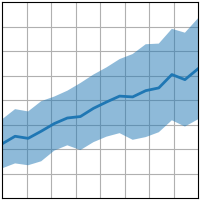

In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget
plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = np.linspace(0, 8, 16)
y1 = 3 + 4*x/8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2*x/8 + np.random.uniform(0.0, 0.5, len(x))

# plot
fig, ax = plt.subplots()

ax.fill_between(x, y1, y2, alpha=.5, linewidth=0)
ax.plot(x, (y1 + y2)/2, linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [5]:
import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

def beta_pdf(x, a, b):
    return (x**(a-1) * (1-x)**(b-1) * math.gamma(a + b)
            / (math.gamma(a) * math.gamma(b)))


class UpdateDist:
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 10)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            self.success = 0
            self.line.set_data([], [])
            return self.line,

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand() < self.prob:
            self.success += 1
        y = beta_pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=100, interval=1000, blit=True)
plt.show()

ModuleNotFoundError: No module named 'ipympl'

$
x=\frac{\sqrt{3}T_s}{U_{dc}}U_{\beta}
$\
$
y=\frac{\sqrt{3}T_s}{U_{dc}}( \frac{\sqrt{3}}{2}U_{\alpha}+\frac{1}{2}U_{\beta})
$\
$
z=\frac{\sqrt{3}T_s}{U_{dc}}( -\frac{\sqrt{3}}{2}U_{\alpha}+\frac{1}{2}U_{\beta})
$

| Sector |  1  |  2  |  3  |  4  |  5  |  6 |
|   ---  | --- | --- | --- | --- | --- | ---|
|    N   |  3  |  1  |  5  |  4  |  6  |  2 |
|  phase | 4->6| 6->2| 2->3| 3->1| 1->5|5->4|
|  T_1st |  -z |  y  |  x  |   z |  -y | -x |
|  T_2nd |  x  |  z  |  -y |  -x |  -z |  y |
|   T_0  |  3  |  1  |  5  |  4  |  6  |  2 |

2 4 5 6 not correct

In [7]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import math
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
#创建figure窗口，figsize设置窗口的大小
# fig, ax = plt.figure()
# fig, ax = plt.subplots()#figsize = (8.0,8.0)
fig, ax_u_l = plt.subplots(
    ncols=1,
    # sharey=True,
    # figsize=(6, 2),
    figsize=(8, 8),
    # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
freq=20e3
Ts=1/freq
U_dc=12
U_m=2/3*U_dc
# ax=fig.subplots()
# ax.set_xlim=(-2.5,2.5)
# ax.set_ylim=(-2.5,2.5)
#######Draw a Circle#######################
theta_1=np.linspace(0,2*np.pi,100)
theta_1_x=U_dc*np.cos(theta_1)
theta_1_y=U_dc*np.sin(theta_1)
ax_u_l.plot(theta_1_x,theta_1_y)
ax_u_l.set_xlim(-U_dc*1.2,U_dc*1.2)
ax_u_l.set_ylim(-U_dc*1.2,U_dc*1.2)
###Draw a Hexagon ############
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_dc*np.cos(theta)
theta_y=U_dc*np.sin(theta)
# theta_rad_2=math.radians(theta_2)
# ax_u_r.plot(center[:,0], center[:,1])#, color='r'
###Draw a Hexagon ############
ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.annotate('0[100]4', xy=(theta_x[0], theta_y[0]), xytext=(theta_x[0], theta_y[0]))
            # arrowprops=dict(facecolor='black', shrink=0.05),
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.annotate('$\pi/3$[110]6', xy=(theta_x[1], theta_y[1]), xytext=(theta_x[1], theta_y[1]))

ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.annotate('$2\pi/3$[010]2', xy=(theta_x[2], theta_y[2]), xytext=(theta_x[2], theta_y[2]))

ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.annotate('$\pi$[011]3', xy=(theta_x[3], theta_y[3]), xytext=(theta_x[3], theta_y[3]))

ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.annotate('$4\pi/3$[001]1', xy=(theta_x[4], theta_y[4]), xytext=(theta_x[4], theta_y[4]))

ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
ax_u_l.annotate('$5\pi/3$[101]5', xy=(theta_x[5], theta_y[5]), xytext=(theta_x[5], theta_y[5]))

# x = np.linspace(0, 2 * np.pi, 50)
# ax_u_l.plot(U_m*np.cos(x), U_m*np.sin(x), lw=0.3)#, "k"

#设置坐标轴刻度
# my_x_ticks = np.linspace(-2, 2, 10)
# #对比范围和名称的区别
# #my_x_ticks = np.arange(-5, 2, 0.5)
# my_y_ticks = np.linspace(-2, 2, 10)
# ax_u_l.set_xticks(my_x_ticks)
# ax_u_l.set_yticks(my_x_ticks)
# plt.xticks()
# plt.yticks(my_y_ticks)
# ax_u_l.plot(theta_x,theta_y)
theta_deg=40
theta_radian =np.deg2rad(theta_deg) #1/12*np.pi#0##2/3*np.pi #np.linspace(0, 2 * np.pi, 50)
# theta_radian =41/24*np.pi #1/12*np.pi#0##2/3*np.pi #np.linspace(0, 2 * np.pi, 50)

U_alpha =   U_m*np.cos(theta_radian)
U_beta  =   U_m*np.sin(theta_radian)
U_S_x   =   U_dc*np.cos(theta_radian)
U_S_y   =   U_dc*np.sin(theta_radian)
U_A_x   =   U_m*np.cos(theta_radian)
U_A_y   =   0
U_B_x   =   U_m*np.cos(2/3*np.pi)*np.cos(theta_radian-2/3*np.pi)
U_B_y   =   U_m*np.sin(2/3*np.pi)*np.cos(theta_radian-2/3*np.pi)
U_C_x   =   U_m*np.cos(4/3*np.pi)*np.cos(theta_radian+2/3*np.pi)
U_C_y   =   U_m*np.sin(4/3*np.pi)*np.cos(theta_radian+2/3*np.pi)
#########Calculate N from U_alpha U_beta#####################################
U_ref1=U_beta
U_ref2=np.sqrt(3)/2*U_alpha-1/2*U_beta
U_ref3=-np.sqrt(3)/2*U_alpha-1/2*U_beta
if U_ref1>0:
    A = 1
else :
    A = 0
if U_ref2>0:
     B = 1
else :
     B = 0
if U_ref3>0:
    C = 1
else :
     C = 0
N=4*C+2*B+A
print("N = ",N)
T_x = np.sqrt(3)*Ts*U_beta/U_dc
T_y = np.sqrt(3)*Ts*(np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
T_z = np.sqrt(3)*Ts*(-np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
# sector=math.ceil(theta_radian/(1/3*np.pi))# up 
sector=int(theta_radian/(1/3*np.pi)+1)# up
print("sector = ",sector)
match sector:
    case 1:#Sector 1 N 3
        ####Sector 4-6 ####
        T_1_temp=-T_z
        T_2_temp=T_x
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2

        U_4_start_x=0
        U_4_start_y=0
        U_4_end_x=T_1/Ts*2/3*U_dc*np.cos(0)
        U_4_end_y=T_1/Ts*2/3*U_dc*np.sin(0)
        U_6_start_x=0
        U_6_start_y=0
        U_6_end_x=T_2/Ts*2/3*U_dc*np.cos(1/3*np.pi)
        U_6_end_y=T_2/Ts*2/3*U_dc*np.sin(1/3*np.pi)

        U_4_2_Us_start_x=U_4_end_x
        U_4_2_Us_start_y=U_4_end_y
        U_4_2_Us_end_dx=U_6_end_x
        U_4_2_Us_end_dy=U_6_end_y

        U_6_2_Us_start_x=U_6_end_x
        U_6_2_Us_start_y=U_6_end_y
        U_6_2_Us_end_dx=U_4_end_x
        U_6_2_Us_end_dy=U_4_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_4_end_x+U_6_end_x
        U_S_m_end_y=U_4_end_y+U_6_end_y

        # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
        print("U_4 = ",T_1*2/3*U_dc)
    case 2:#Sector 2 N 1
        ####Sector 6-2 ####
        T_1_temp = T_y
        T_2_temp = T_z
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2
        U_6_start_x=0
        U_6_start_y=0
        U_6_end_x=T_1/Ts*2/3*U_dc*np.cos(1/3*np.pi)
        U_6_end_y=T_1/Ts*2/3*U_dc*np.sin(1/3*np.pi)
        U_2_start_x=0
        U_2_start_y=0
        U_2_end_x=T_2/Ts*2/3*U_dc*np.cos(2/3*np.pi)
        U_2_end_y=T_2/Ts*2/3*U_dc*np.sin(2/3*np.pi)

        U_6_2_Us_start_x=U_6_end_x
        U_6_2_Us_start_y=U_6_end_y
        U_6_2_Us_end_dx=U_2_end_x
        U_6_2_Us_end_dy=U_2_end_y

        U_2_2_Us_start_x=U_2_end_x
        U_2_2_Us_start_y=U_2_end_y
        U_2_2_Us_end_dx=U_6_end_x
        U_2_2_Us_end_dy=U_6_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_6_end_x+U_2_end_x
        U_S_m_end_y=U_6_end_y+U_2_end_y

        # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
    case 3:#Sector 3 N 5
        ####Sector 2-3 ####
        T_1_temp = T_x
        T_2_temp = -T_y
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2
        U_2_start_x=0
        U_2_start_y=0
        U_2_end_x=T_1/Ts*2/3*U_dc*np.cos(2/3*np.pi)
        U_2_end_y=T_1/Ts*2/3*U_dc*np.sin(2/3*np.pi)
        U_3_start_x=0
        U_3_start_y=0
        U_3_end_x=T_2/Ts*2/3*U_dc*np.cos(np.pi)
        U_3_end_y=T_2/Ts*2/3*U_dc*np.sin(np.pi)

        U_2_2_Us_start_x=U_2_end_x
        U_2_2_Us_start_y=U_2_end_y
        U_2_2_Us_end_dx=U_3_end_x
        U_2_2_Us_end_dy=U_3_end_y

        U_3_2_Us_start_x=U_3_end_x
        U_3_2_Us_start_y=U_3_end_y
        U_3_2_Us_end_dx=U_2_end_x
        U_3_2_Us_end_dy=U_2_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_2_end_x+U_3_end_x
        U_S_m_end_y=U_2_end_y+U_3_end_y

        # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        # U_c_phase
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)

    case 4:#Sector 4 N 4
        ####Sector 3-1 ####
        T_1_temp = T_z
        T_2_temp = -T_x
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2

        U_3_start_x=0
        U_3_start_y=0
        U_3_end_x=T_1/Ts*2/3*U_dc*np.cos(3/3*np.pi)
        U_3_end_y=T_1/Ts*2/3*U_dc*np.sin(3/3*np.pi)
        U_1_start_x=0
        U_1_start_y=0
        U_1_end_x=T_2/Ts*2/3*U_dc*np.cos(4/3*np.pi)
        U_1_end_y=T_2/Ts*2/3*U_dc*np.sin(4/3*np.pi)

        U_3_2_Us_start_x=U_3_end_x
        U_3_2_Us_start_y=U_3_end_y
        U_3_2_Us_end_dx=U_1_end_x
        U_3_2_Us_end_dy=U_1_end_y

        U_1_2_Us_start_x=U_1_end_x
        U_1_2_Us_start_y=U_1_end_y
        U_1_2_Us_end_dx=U_3_end_x
        U_1_2_Us_end_dy=U_3_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_3_end_x+U_1_end_x
        U_S_m_end_y=U_3_end_y+U_1_end_y
        
        # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)

    case 5:#Sector 5 N 6
        ####Sector 1-5 ####
        T_1_temp = -T_y
        T_2_temp = -T_z
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2

        U_1_start_x=0
        U_1_start_y=0
        U_1_end_x=T_1/Ts*2/3*U_dc*np.cos(4/3*np.pi)
        U_1_end_y=T_1/Ts*2/3*U_dc*np.sin(4/3*np.pi)
        U_5_start_x=0
        U_5_start_y=0
        U_5_end_x=T_2/Ts*2/3*U_dc*np.cos(5/3*np.pi)
        U_5_end_y=T_2/Ts*2/3*U_dc*np.sin(5/3*np.pi)

        U_1_2_Us_start_x=U_1_end_x
        U_1_2_Us_start_y=U_1_end_y
        U_1_2_Us_end_dx=U_5_end_x
        U_1_2_Us_end_dy=U_5_end_y

        U_5_2_Us_start_x=U_5_end_x
        U_5_2_Us_start_y=U_5_end_y
        U_5_2_Us_end_dx=U_1_end_x
        U_5_2_Us_end_dy=U_1_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_1_end_x+U_5_end_x
        U_S_m_end_y=U_1_end_y+U_5_end_y
        
        # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
    
    case 6:#Sector 6 N 2
        ####Sector 5-4 ####
        T_1_temp =-T_x 
        T_2_temp = T_y
        if (T_1_temp+T_2_temp)>=Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2
        U_5_start_x=0
        U_5_start_y=0
        U_5_end_x=T_1/Ts*2/3*U_dc*np.cos(5/3*np.pi)
        U_5_end_y=T_1/Ts*2/3*U_dc*np.sin(5/3*np.pi)
        U_4_start_x=0
        U_4_start_y=0
        U_4_end_x=T_2/Ts*2/3*U_dc*np.cos(6/3*np.pi)
        U_4_end_y=T_2/Ts*2/3*U_dc*np.sin(6/3*np.pi)

        U_5_2_Us_start_x=U_5_end_x
        U_5_2_Us_start_y=U_5_end_y
        U_5_2_Us_end_dx=U_4_end_x
        U_5_2_Us_end_dy=U_4_end_y

        U_4_2_Us_start_x=U_4_end_x
        U_4_2_Us_start_y=U_4_end_y
        U_4_2_Us_end_dx=U_5_end_x
        U_4_2_Us_end_dy=U_5_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_5_end_x+U_4_end_x
        U_S_m_end_y=U_5_end_y+U_4_end_y

        # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
# print("T_x = ",T_x)
# print("T_y = ",T_y)
# print("T_z = ",T_z)
# U_alpha_Start_x     =   0
# U_alpha_Start_y     =   0
# U_alpha_End_x       =   U_alpha
# U_alpha_End_y       =   0

# U_beta_Start_x      =   0
# U_beta_Start_y      =   0
# U_beta_End_x        =   0
# U_beta_End_y        =   U_beta

# U_S_Start_x =   0
# U_S_Start_y =   0
# U_S_End_x   =   U_S_x
# U_S_End_y   =   U_S_y

# U_A_Start_x =   0
# U_A_Start_y =   0
# U_A_End_x   =   U_A_x
# U_A_End_y   =   U_A_y

# U_B_Start_x =   0
# U_B_Start_y =   0
# U_B_End_x   =   U_B_x
# U_B_End_y   =   U_B_y

# U_C_Start_x =   0
# U_C_Start_y =   0
# U_C_End_x   =   U_C_x
# U_C_End_y   =   U_C_y

# U_A_2_U_B_Start_x   = U_A_End_x
# U_A_2_U_B_Start_y   = U_A_End_y
# U_A_2_U_B_End_dx     = U_B_End_x
# U_A_2_U_B_End_dy     = U_B_End_y

# U_B_2_U_C_Start_x   = U_A_2_U_B_Start_x + U_A_2_U_B_End_dx
# U_B_2_U_C_Start_y   = U_A_2_U_B_Start_y + U_A_2_U_B_End_dy
# U_B_2_U_C_End_dx     = U_C_End_x
# U_B_2_U_C_End_dy     = U_C_End_y



# U_S = ax_u_l.add_patch(plt.Arrow(U_S_Start_x,U_S_Start_y,U_S_End_x,U_S_End_y, width = 0.05, color = 'b'))


# U_A = ax.add_patch(plt.Arrow(U_A_Start_x,U_A_Start_y,U_A_End_x,U_A_End_y, width = 0.05, color = 'g'))
# U_B = ax.add_patch(plt.Arrow(U_B_Start_x,U_B_Start_y,U_B_End_x,U_B_End_y, width = 0.05, color = 'r'))
# U_C = ax.add_patch(plt.Arrow(U_C_Start_x,U_C_Start_y,U_C_End_x,U_C_End_y, width = 0.05, color = 'c'))
# U_alpha = ax.add_patch(plt.Arrow(U_alpha_Start_x,U_alpha_Start_y,U_alpha_End_x,U_alpha_End_y, width = 0.05, color = 'r'))
# U_beta = ax.add_patch(plt.Arrow(U_beta_Start_x,U_beta_Start_y,U_beta_End_x,U_beta_End_y, width = 0.05, color = 'c'))
# U_A_2_U_B = ax.add_patch(plt.Arrow(U_A_2_U_B_Start_x,U_A_2_U_B_Start_y,U_A_2_U_B_End_dx,U_A_2_U_B_End_dy, width = 0.05, color = 'm'))
# U_B_2_U_C = ax.add_patch(plt.Arrow(U_B_2_U_C_Start_x,U_B_2_U_C_Start_y,U_B_2_U_C_End_dx,U_B_2_U_C_End_dy, width = 0.05, color = 'y'))
# print("U_B_2_U_C_Start_x = ",U_B_2_U_C_Start_x)
# print("U_B_2_U_C_Start_y = ",U_B_2_U_C_Start_y)
# print("U_B_2_U_C_End_x   = ",U_B_2_U_C_End_x)
# print("U_B_2_U_C_End_y   = ",U_B_2_U_C_End_y)
# U_S = ax.plot(U_S_Start_x,U_S_Start_y,U_S_End_x,U_S_End_y, color = 'b')
# U_A = ax.plot(U_A_Start_x,U_A_Start_y,U_A_End_x,U_A_End_y, color = 'g')
# U_B = ax.plot(U_B_Start_x,U_B_Start_y,U_B_End_x,U_B_End_y, color = 'r')
# U_C = ax.plot(U_C_Start_x,U_C_Start_y,U_C_End_x,U_C_End_y, color = 'c')
# U_A_2_U_B = ax.plot(U_A_2_U_B_Start_x,U_A_2_U_B_Start_y,U_A_2_U_B_End_x,U_A_2_U_B_End_y, color = 'm')
# U_B_2_U_C = ax.plot(U_B_2_U_C_Start_x,U_B_2_U_C_Start_y,U_B_2_U_C_End_x,U_B_2_U_C_End_y, color = 'y')

plt.grid()
plt.show()

N =  3
sector =  1
T_1_temp =  1.9746542181734927e-05
T_2_temp =  3.7111359948427954e-05
T_1 =  1.736481776669304e-05
T_2 =  3.2635182233306965e-05
T_0 =  0.0
U_4 =  0.00013891854213354433


In [ ]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import math
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
#创建figure窗口，figsize设置窗口的大小
# fig, ax = plt.figure()
# fig, ax = plt.subplots()#figsize = (8.0,8.0)
fig, ax_u_l = plt.subplots(
    ncols=1,
    # sharey=True,
    # figsize=(6, 2),
    figsize=(8, 8),
    # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
freq=20e3
Ts=1/freq
U_dc=1
U_m=2/3*U_dc
# ax=fig.subplots()
# ax.set_xlim=(-2.5,2.5)
# ax.set_ylim=(-2.5,2.5)
#######Draw a Circle#######################
theta_1=np.linspace(0,2*np.pi,100)
theta_1_x=U_dc*np.cos(theta_1)
theta_1_y=U_dc*np.sin(theta_1)
ax_u_l.plot(theta_1_x,theta_1_y)
ax_u_l.set_xlim(-U_dc*1.2,U_dc*1.2)
ax_u_l.set_ylim(-U_dc*1.2,U_dc*1.2)
###Draw a Hexagon ############
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_dc*np.cos(theta)
theta_y=U_dc*np.sin(theta)
# theta_rad_2=math.radians(theta_2)
# ax_u_r.plot(center[:,0], center[:,1])#, color='r'
###Draw a Hexagon ############
ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.annotate('0[100]4', xy=(theta_x[0], theta_y[0]), xytext=(theta_x[0], theta_y[0]))
            # arrowprops=dict(facecolor='black', shrink=0.05),
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.annotate('$\pi/3$[110]6', xy=(theta_x[1], theta_y[1]), xytext=(theta_x[1], theta_y[1]))

ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.annotate('$2\pi/3$[010]2', xy=(theta_x[2], theta_y[2]), xytext=(theta_x[2], theta_y[2]))

ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.annotate('$\pi$[011]3', xy=(theta_x[3], theta_y[3]), xytext=(theta_x[3], theta_y[3]))

ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.annotate('$4\pi/3$[001]1', xy=(theta_x[4], theta_y[4]), xytext=(theta_x[4], theta_y[4]))

ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
ax_u_l.annotate('$5\pi/3$[101]5', xy=(theta_x[5], theta_y[5]), xytext=(theta_x[5], theta_y[5]))

# x = np.linspace(0, 2 * np.pi, 50)
# ax_u_l.plot(U_m*np.cos(x), U_m*np.sin(x), lw=0.3)#, "k"

#设置坐标轴刻度
# my_x_ticks = np.linspace(-2, 2, 10)
# #对比范围和名称的区别
# #my_x_ticks = np.arange(-5, 2, 0.5)
# my_y_ticks = np.linspace(-2, 2, 10)
# ax_u_l.set_xticks(my_x_ticks)
# ax_u_l.set_yticks(my_x_ticks)
# plt.xticks()
# plt.yticks(my_y_ticks)
# ax_u_l.plot(theta_x,theta_y)
theta_deg=40
theta_radian =np.deg2rad(theta_deg) #1/12*np.pi#0##2/3*np.pi #np.linspace(0, 2 * np.pi, 50)
# theta_radian =41/24*np.pi #1/12*np.pi#0##2/3*np.pi #np.linspace(0, 2 * np.pi, 50)

U_alpha =   U_m*np.cos(theta_radian)
U_beta  =   U_m*np.sin(theta_radian)
U_S_x   =   U_dc*np.cos(theta_radian)
U_S_y   =   U_dc*np.sin(theta_radian)
U_A_x   =   U_m*np.cos(theta_radian)
U_A_y   =   0
U_B_x   =   U_m*np.cos(2/3*np.pi)*np.cos(theta_radian-2/3*np.pi)
U_B_y   =   U_m*np.sin(2/3*np.pi)*np.cos(theta_radian-2/3*np.pi)
U_C_x   =   U_m*np.cos(4/3*np.pi)*np.cos(theta_radian+2/3*np.pi)
U_C_y   =   U_m*np.sin(4/3*np.pi)*np.cos(theta_radian+2/3*np.pi)
#########Calculate N from U_alpha U_beta#####################################
U_ref1=U_beta
U_ref2=np.sqrt(3)/2*U_alpha-1/2*U_beta
U_ref3=-np.sqrt(3)/2*U_alpha-1/2*U_beta
if U_ref1>0:
    A = 1
else :
    A = 0
if U_ref2>0:
     B = 1
else :
     B = 0
if U_ref3>0:
    C = 1
else :
     C = 0
N=4*C+2*B+A
print("N = ",N)
T_x = np.sqrt(3)*Ts*U_beta/U_dc
T_y = np.sqrt(3)*Ts*(np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
T_z = np.sqrt(3)*Ts*(-np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
# sector=math.ceil(theta_radian/(1/3*np.pi))# up 
sector=int(theta_radian/(1/3*np.pi)+1)# up
print("sector = ",sector)
match sector:
    case 1:#Sector 1 N 3
        ####Sector 4-6 ####
        T_1_temp=-T_z
        T_2_temp=T_x
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2

        U_4_start_x=0
        U_4_start_y=0
        U_4_end_x=T_1/Ts*2/3*U_dc*np.cos(0)
        U_4_end_y=T_1/Ts*2/3*U_dc*np.sin(0)
        U_6_start_x=0
        U_6_start_y=0
        U_6_end_x=T_2/Ts*2/3*U_dc*np.cos(1/3*np.pi)
        U_6_end_y=T_2/Ts*2/3*U_dc*np.sin(1/3*np.pi)

        U_4_2_Us_start_x=U_4_end_x
        U_4_2_Us_start_y=U_4_end_y
        U_4_2_Us_end_dx=U_6_end_x
        U_4_2_Us_end_dy=U_6_end_y

        U_6_2_Us_start_x=U_6_end_x
        U_6_2_Us_start_y=U_6_end_y
        U_6_2_Us_end_dx=U_4_end_x
        U_6_2_Us_end_dy=U_4_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_4_end_x+U_6_end_x
        U_S_m_end_y=U_4_end_y+U_6_end_y

        # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
        print("U_4 = ",T_1*2/3*U_dc)
    case 2:#Sector 2 N 1
        ####Sector 6-2 ####
        T_1_temp = T_y
        T_2_temp = T_z
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2
        U_6_start_x=0
        U_6_start_y=0
        U_6_end_x=T_1/Ts*2/3*U_dc*np.cos(1/3*np.pi)
        U_6_end_y=T_1/Ts*2/3*U_dc*np.sin(1/3*np.pi)
        U_2_start_x=0
        U_2_start_y=0
        U_2_end_x=T_2/Ts*2/3*U_dc*np.cos(2/3*np.pi)
        U_2_end_y=T_2/Ts*2/3*U_dc*np.sin(2/3*np.pi)

        U_6_2_Us_start_x=U_6_end_x
        U_6_2_Us_start_y=U_6_end_y
        U_6_2_Us_end_dx=U_2_end_x
        U_6_2_Us_end_dy=U_2_end_y

        U_2_2_Us_start_x=U_2_end_x
        U_2_2_Us_start_y=U_2_end_y
        U_2_2_Us_end_dx=U_6_end_x
        U_2_2_Us_end_dy=U_6_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_6_end_x+U_2_end_x
        U_S_m_end_y=U_6_end_y+U_2_end_y

        # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
    case 3:#Sector 3 N 5
        ####Sector 2-3 ####
        T_1_temp = T_x
        T_2_temp = -T_y
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2
        U_2_start_x=0
        U_2_start_y=0
        U_2_end_x=T_1/Ts*2/3*U_dc*np.cos(2/3*np.pi)
        U_2_end_y=T_1/Ts*2/3*U_dc*np.sin(2/3*np.pi)
        U_3_start_x=0
        U_3_start_y=0
        U_3_end_x=T_2/Ts*2/3*U_dc*np.cos(np.pi)
        U_3_end_y=T_2/Ts*2/3*U_dc*np.sin(np.pi)

        U_2_2_Us_start_x=U_2_end_x
        U_2_2_Us_start_y=U_2_end_y
        U_2_2_Us_end_dx=U_3_end_x
        U_2_2_Us_end_dy=U_3_end_y

        U_3_2_Us_start_x=U_3_end_x
        U_3_2_Us_start_y=U_3_end_y
        U_3_2_Us_end_dx=U_2_end_x
        U_3_2_Us_end_dy=U_2_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_2_end_x+U_3_end_x
        U_S_m_end_y=U_2_end_y+U_3_end_y

        # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        # U_c_phase
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)

    case 4:#Sector 4 N 4
        ####Sector 3-1 ####
        T_1_temp = T_z
        T_2_temp = -T_x
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2

        U_3_start_x=0
        U_3_start_y=0
        U_3_end_x=T_1/Ts*2/3*U_dc*np.cos(3/3*np.pi)
        U_3_end_y=T_1/Ts*2/3*U_dc*np.sin(3/3*np.pi)
        U_1_start_x=0
        U_1_start_y=0
        U_1_end_x=T_2/Ts*2/3*U_dc*np.cos(4/3*np.pi)
        U_1_end_y=T_2/Ts*2/3*U_dc*np.sin(4/3*np.pi)

        U_3_2_Us_start_x=U_3_end_x
        U_3_2_Us_start_y=U_3_end_y
        U_3_2_Us_end_dx=U_1_end_x
        U_3_2_Us_end_dy=U_1_end_y

        U_1_2_Us_start_x=U_1_end_x
        U_1_2_Us_start_y=U_1_end_y
        U_1_2_Us_end_dx=U_3_end_x
        U_1_2_Us_end_dy=U_3_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_3_end_x+U_1_end_x
        U_S_m_end_y=U_3_end_y+U_1_end_y
        
        # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)

    case 5:#Sector 5 N 6
        ####Sector 1-5 ####
        T_1_temp = -T_y
        T_2_temp = -T_z
        if (T_1_temp+T_2_temp)>Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2

        U_1_start_x=0
        U_1_start_y=0
        U_1_end_x=T_1/Ts*2/3*U_dc*np.cos(4/3*np.pi)
        U_1_end_y=T_1/Ts*2/3*U_dc*np.sin(4/3*np.pi)
        U_5_start_x=0
        U_5_start_y=0
        U_5_end_x=T_2/Ts*2/3*U_dc*np.cos(5/3*np.pi)
        U_5_end_y=T_2/Ts*2/3*U_dc*np.sin(5/3*np.pi)

        U_1_2_Us_start_x=U_1_end_x
        U_1_2_Us_start_y=U_1_end_y
        U_1_2_Us_end_dx=U_5_end_x
        U_1_2_Us_end_dy=U_5_end_y

        U_5_2_Us_start_x=U_5_end_x
        U_5_2_Us_start_y=U_5_end_y
        U_5_2_Us_end_dx=U_1_end_x
        U_5_2_Us_end_dy=U_1_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_1_end_x+U_5_end_x
        U_S_m_end_y=U_1_end_y+U_5_end_y
        
        # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
    
    case 6:#Sector 6 N 2
        ####Sector 5-4 ####
        T_1_temp =-T_x 
        T_2_temp = T_y
        if (T_1_temp+T_2_temp)>=Ts:
            T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
            T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
        else :
            T_1 = T_1_temp
            T_2 = T_2_temp
        T_0 = Ts-T_1-T_2
        U_5_start_x=0
        U_5_start_y=0
        U_5_end_x=T_1/Ts*2/3*U_dc*np.cos(5/3*np.pi)
        U_5_end_y=T_1/Ts*2/3*U_dc*np.sin(5/3*np.pi)
        U_4_start_x=0
        U_4_start_y=0
        U_4_end_x=T_2/Ts*2/3*U_dc*np.cos(6/3*np.pi)
        U_4_end_y=T_2/Ts*2/3*U_dc*np.sin(6/3*np.pi)

        U_5_2_Us_start_x=U_5_end_x
        U_5_2_Us_start_y=U_5_end_y
        U_5_2_Us_end_dx=U_4_end_x
        U_5_2_Us_end_dy=U_4_end_y

        U_4_2_Us_start_x=U_4_end_x
        U_4_2_Us_start_y=U_4_end_y
        U_4_2_Us_end_dx=U_5_end_x
        U_4_2_Us_end_dy=U_5_end_y

        U_S_m_start_x=0
        U_S_m_start_y=0
        U_S_m_end_x=U_5_end_x+U_4_end_x
        U_S_m_end_y=U_5_end_y+U_4_end_y

        # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        
        U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
        U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
        U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
        U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
        U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
        print("T_1_temp = ",T_1_temp)
        print("T_2_temp = ",T_2_temp)
        print("T_1 = ",T_1)
        print("T_2 = ",T_2)
        print("T_0 = ",T_0)
# print("T_x = ",T_x)
# print("T_y = ",T_y)
# print("T_z = ",T_z)
# U_alpha_Start_x     =   0
# U_alpha_Start_y     =   0
# U_alpha_End_x       =   U_alpha
# U_alpha_End_y       =   0

# U_beta_Start_x      =   0
# U_beta_Start_y      =   0
# U_beta_End_x        =   0
# U_beta_End_y        =   U_beta

# U_S_Start_x =   0
# U_S_Start_y =   0
# U_S_End_x   =   U_S_x
# U_S_End_y   =   U_S_y

# U_A_Start_x =   0
# U_A_Start_y =   0
# U_A_End_x   =   U_A_x
# U_A_End_y   =   U_A_y

# U_B_Start_x =   0
# U_B_Start_y =   0
# U_B_End_x   =   U_B_x
# U_B_End_y   =   U_B_y

# U_C_Start_x =   0
# U_C_Start_y =   0
# U_C_End_x   =   U_C_x
# U_C_End_y   =   U_C_y

# U_A_2_U_B_Start_x   = U_A_End_x
# U_A_2_U_B_Start_y   = U_A_End_y
# U_A_2_U_B_End_dx     = U_B_End_x
# U_A_2_U_B_End_dy     = U_B_End_y

# U_B_2_U_C_Start_x   = U_A_2_U_B_Start_x + U_A_2_U_B_End_dx
# U_B_2_U_C_Start_y   = U_A_2_U_B_Start_y + U_A_2_U_B_End_dy
# U_B_2_U_C_End_dx     = U_C_End_x
# U_B_2_U_C_End_dy     = U_C_End_y



# U_S = ax_u_l.add_patch(plt.Arrow(U_S_Start_x,U_S_Start_y,U_S_End_x,U_S_End_y, width = 0.05, color = 'b'))


# U_A = ax.add_patch(plt.Arrow(U_A_Start_x,U_A_Start_y,U_A_End_x,U_A_End_y, width = 0.05, color = 'g'))
# U_B = ax.add_patch(plt.Arrow(U_B_Start_x,U_B_Start_y,U_B_End_x,U_B_End_y, width = 0.05, color = 'r'))
# U_C = ax.add_patch(plt.Arrow(U_C_Start_x,U_C_Start_y,U_C_End_x,U_C_End_y, width = 0.05, color = 'c'))
# U_alpha = ax.add_patch(plt.Arrow(U_alpha_Start_x,U_alpha_Start_y,U_alpha_End_x,U_alpha_End_y, width = 0.05, color = 'r'))
# U_beta = ax.add_patch(plt.Arrow(U_beta_Start_x,U_beta_Start_y,U_beta_End_x,U_beta_End_y, width = 0.05, color = 'c'))
# U_A_2_U_B = ax.add_patch(plt.Arrow(U_A_2_U_B_Start_x,U_A_2_U_B_Start_y,U_A_2_U_B_End_dx,U_A_2_U_B_End_dy, width = 0.05, color = 'm'))
# U_B_2_U_C = ax.add_patch(plt.Arrow(U_B_2_U_C_Start_x,U_B_2_U_C_Start_y,U_B_2_U_C_End_dx,U_B_2_U_C_End_dy, width = 0.05, color = 'y'))
# print("U_B_2_U_C_Start_x = ",U_B_2_U_C_Start_x)
# print("U_B_2_U_C_Start_y = ",U_B_2_U_C_Start_y)
# print("U_B_2_U_C_End_x   = ",U_B_2_U_C_End_x)
# print("U_B_2_U_C_End_y   = ",U_B_2_U_C_End_y)
# U_S = ax.plot(U_S_Start_x,U_S_Start_y,U_S_End_x,U_S_End_y, color = 'b')
# U_A = ax.plot(U_A_Start_x,U_A_Start_y,U_A_End_x,U_A_End_y, color = 'g')
# U_B = ax.plot(U_B_Start_x,U_B_Start_y,U_B_End_x,U_B_End_y, color = 'r')
# U_C = ax.plot(U_C_Start_x,U_C_Start_y,U_C_End_x,U_C_End_y, color = 'c')
# U_A_2_U_B = ax.plot(U_A_2_U_B_Start_x,U_A_2_U_B_Start_y,U_A_2_U_B_End_x,U_A_2_U_B_End_y, color = 'm')
# U_B_2_U_C = ax.plot(U_B_2_U_C_Start_x,U_B_2_U_C_Start_y,U_B_2_U_C_End_x,U_B_2_U_C_End_y, color = 'y')

plt.grid()
plt.show()

In [17]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import math
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
fig, ax_u_l = plt.subplots(
    ncols=1,
    # sharey=True,
    # figsize=(6, 2),
    figsize=(8, 8),
    # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
freq=20e3
Ts=1/freq
U_dc=1
U_m=2/3*U_dc
# ax=fig.subplots()
# ax.set_xlim=(-2.5,2.5)
# ax.set_ylim=(-2.5,2.5)
##########Annoate theta#####################################
theta_template = 'theta = %.0fdeg'
theta_text = ax_u_l.text(0.05, 0.9, '', transform=ax_u_l.transAxes, fontsize = 14)  
theta_text.set_text(theta_template % (0))#'theta = %.0fs'
theta_text.set_text('theta = %.0fdeg')

#######Draw a Circle#######################
theta_1=np.linspace(0,2*np.pi,100)
theta_1_x=U_dc*np.cos(theta_1)
theta_1_y=U_dc*np.sin(theta_1)
ax_u_l.plot(theta_1_x,theta_1_y)
ax_u_l.plot(2/3*theta_1_x,2/3*theta_1_y)
ax_u_l.plot(2/3*(np.sqrt(3)/2)*theta_1_x,2/3*(np.sqrt(3)/2)*theta_1_y)
ax_u_l.set_xlim(-U_dc*1.2,U_dc*1.2)
ax_u_l.set_ylim(-U_dc*1.2,U_dc*1.2)
###Draw a Hexagon ############
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_dc*np.cos(theta)
theta_y=U_dc*np.sin(theta)

ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot(2/3*theta_x, 2/3*theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.annotate('0[100]4', xy=(theta_x[0], theta_y[0]), xytext=(theta_x[0], theta_y[0]))
            # arrowprops=dict(facecolor='black', shrink=0.05),
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.annotate('$\pi/3$[110]6', xy=(theta_x[1], theta_y[1]), xytext=(theta_x[1], theta_y[1]))

ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.annotate('$2\pi/3$[010]2', xy=(theta_x[2], theta_y[2]), xytext=(theta_x[2], theta_y[2]))

ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.annotate('$\pi$[011]3', xy=(theta_x[3], theta_y[3]), xytext=(theta_x[3], theta_y[3]))

ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.annotate('$4\pi/3$[001]1', xy=(theta_x[4], theta_y[4]), xytext=(theta_x[4], theta_y[4]))

ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
ax_u_l.annotate('$5\pi/3$[101]5', xy=(theta_x[5], theta_y[5]), xytext=(theta_x[5], theta_y[5]))


line, = ax_u_l.plot([0], [0],'k--')

origin, = ax_u_l.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_S_m          = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))

theta_Sector_Seq=np.linspace(1/4*np.pi,2*np.pi+1/4*np.pi,7)
# theta_len=np.size(theta)
theta_Sector_Seq_x=U_dc*np.cos(theta_Sector_Seq)
theta_Sector_Seq_y=U_dc*np.sin(theta_Sector_Seq)
offset_fac_x=0.8
offset_fac_y=0.8
# Sector_1_Seq_1_start_x  =   offset_fac_x*theta_x[0]
# Sector_1_Seq_1_start_y  =   offset_fac_y*theta_x[0]
# Sector_1_Seq_1_end_dx    =   0 + (1-offset_fac_x)*theta_x[0]
# Sector_1_Seq_1_end_dy    =   0 + (1-offset_fac_y)*theta_y[0]

Sector_1_Seq_1_start_x  =   0 + (1-offset_fac_x)*theta_x[0]
Sector_1_Seq_1_start_y  =   0 + (1-offset_fac_y)*theta_y[0]
Sector_1_Seq_1_end_dx    =   offset_fac_x*theta_x[0]
Sector_1_Seq_1_end_dy    =   offset_fac_y*theta_x[0]
# Sector_1_Seq_2_start_x  =   offset_fac_x*theta_x[0]
# Sector_1_Seq_2_start_y  =   offset_fac_y*theta_x[0]
# Sector_1_Seq_2_end_dx    =
# Sector_1_Seq_2_end_dy    =
# Sector_1_Seq_3_start_x  =
# Sector_1_Seq_3_start_y  =
# Sector_1_Seq_3_end_dx    =
# Sector_1_Seq_3_end_dy    =

Sector_1_Seq_1 = ax_u_l.add_patch(plt.Arrow(Sector_1_Seq_1_start_x,Sector_1_Seq_1_start_y,Sector_1_Seq_1_end_dx,Sector_1_Seq_1_end_dx, width = 0.05, color = 'b'))
print("Sector_1_Seq_1_start_x = ",Sector_1_Seq_1_start_x)
print("Sector_1_Seq_1_start_y = ",Sector_1_Seq_1_start_y)
print("Sector_1_Seq_1_end_dx = ",Sector_1_Seq_1_end_dx)
print("Sector_1_Seq_1_end_dy = ",Sector_1_Seq_1_end_dy)

# Sector_1_Seq_2 = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
# Sector_1_Seq_3 = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
# theObject, = ax_u_l.plot([1], [1], marker = 'o', markersize = 1000, markerfacecolor = 'b')

# x = np.linspace(0, 2 * np.pi, 50)
# U_A=U_m*np.cos(x)
# U_B=U_m*np.cos(x-2/3*np.pi)
# U_C=U_m*np.cos(x+2/3*np.pi)
# U_SVPWM=np.cos(x)
# U_alpha=U_A
# U_beta=U_m*np.sin(x)
# U_A,= ax_u_r.plot(x, U_A)
# U_B,= ax_u_r.plot(x, U_B)
# U_C,= ax_u_r.plot(x, U_C)
# U_SVPWM,=ax_u_r.plot(x, U_SVPWM)
# ax_u_r.grid('both')
# sine, cos= ax_u_r.plot(x, np.sin(x), np.cos(x))

def init():
    # line_l.set_data([],[],[] ,[])
    # line_m.set_data([],[],[] ,[]) 

    # theObject.set_data([], [])
    # time_text.set_text('')
    # U_A.set_data([], [])
    # U_B.set_data([], [])
    # U_C.set_data([], [])
    # U_alpha.set_data([], [])
    # U_beta.set_data([], [])
    # U_SVPWM.set_data([], [])

    # theObject.set_data([], [])
    theta_text.set_text('')
    # theta_text.set_text(theta_template % (0))
    return theta_text,#theObject#U_A, U_B, U_C, U_SVPWM,U_alpha,U_beta,

def animate(frames):
    # pos = np.cos(i), np.sin(i)
    # x = np.linspace(0, i, int(i * 10000 / np.pi))
    theta_deg = frames
    theta_radian=math.radians(theta_deg)
    U_alpha=np.cos(theta_radian)
    U_beta=np.sin(theta_radian)
    line_l_start_x=0
    line_l_start_y=0
    line_l_end_x=U_alpha
    line_l_end_y=U_beta
    theta_text.set_text(theta_template % (theta_deg))
    #########Calculate N from U_alpha U_beta#####################################
    U_ref1=U_beta
    U_ref2=np.sqrt(3)/2*U_alpha-1/2*U_beta
    U_ref3=-np.sqrt(3)/2*U_alpha-1/2*U_beta
    if U_ref1>0:
        A = 1
    else :
        A = 0
    if U_ref2>0:
        B = 1
    else :
        B = 0
    if U_ref3>0:
        C = 1
    else :
        C = 0
    N=4*C+2*B+A
    print("N = ",N)
    T_x = np.sqrt(3)*Ts*U_beta/U_dc
    T_y = np.sqrt(3)*Ts*(np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    T_z = np.sqrt(3)*Ts*(-np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    # sector=math.ceil(theta_radian/(1/3*np.pi))# up 
    sector=int(theta_radian/(1/3*np.pi)+1)# up 
    print("sector = ",sector)
    print("deg = ",theta_deg)
    match sector:
        case 1:#Sector 1 N 3
            ####Sector 4-6 ####
            T_1_temp=-T_z
            T_2_temp=T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_1/Ts*2/3*U_dc*np.cos(0)
            U_4_end_y=T_1/Ts*2/3*U_dc*np.sin(0)
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_2/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_2/Ts*2/3*U_dc*np.sin(1/3*np.pi)

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_6_end_x
            U_4_2_Us_end_dy=U_6_end_y

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_4_end_x
            U_6_2_Us_end_dy=U_4_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_4_end_x+U_6_end_x
            U_S_m_end_y=U_4_end_y+U_6_end_y

            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("theta_deg = ",theta_deg)
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        case 2:#Sector 2 N 1
            ####Sector 6-2 ####
            T_1_temp = T_y
            T_2_temp = T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_1/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_1/Ts*2/3*U_dc*np.sin(1/3*np.pi)
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_2/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_2/Ts*2/3*U_dc*np.sin(2/3*np.pi)

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_2_end_x
            U_6_2_Us_end_dy=U_2_end_y

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_6_end_x
            U_2_2_Us_end_dy=U_6_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_6_end_x+U_2_end_x
            U_S_m_end_y=U_6_end_y+U_2_end_y

            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("theta_deg = ",theta_deg)
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        case 3:#Sector 3 N 5
            ####Sector 2-3 ####
            T_1_temp = T_x
            T_2_temp = -T_y
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_1/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_1/Ts*2/3*U_dc*np.sin(2/3*np.pi)
            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_2/Ts*2/3*U_dc*np.cos(np.pi)
            U_3_end_y=T_2/Ts*2/3*U_dc*np.sin(np.pi)

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_3_end_x
            U_2_2_Us_end_dy=U_3_end_y

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_2_end_x
            U_3_2_Us_end_dy=U_2_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_2_end_x+U_3_end_x
            U_S_m_end_y=U_2_end_y+U_3_end_y

            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            # U_c_phase
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("theta_deg = ",theta_deg)
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)

        case 4:#Sector 4 N 4
            ####Sector 3-1 ####
            T_1_temp = T_z
            T_2_temp = -T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_1/Ts*2/3*U_dc*np.cos(3/3*np.pi)
            U_3_end_y=T_1/Ts*2/3*U_dc*np.sin(3/3*np.pi)
            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_2/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_2/Ts*2/3*U_dc*np.sin(4/3*np.pi)

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_1_end_x
            U_3_2_Us_end_dy=U_1_end_y

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_3_end_x
            U_1_2_Us_end_dy=U_3_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_3_end_x+U_1_end_x
            U_S_m_end_y=U_3_end_y+U_1_end_y
            
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("theta_deg = ",theta_deg)
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)

        case 5:#Sector 5 N 6
            ####Sector 1-5 ####
            T_1_temp = -T_y
            T_2_temp = -T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_1/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_1/Ts*2/3*U_dc*np.sin(4/3*np.pi)
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_2/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_2/Ts*2/3*U_dc*np.sin(5/3*np.pi)

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_5_end_x
            U_1_2_Us_end_dy=U_5_end_y

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_1_end_x
            U_5_2_Us_end_dy=U_1_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_1_end_x+U_5_end_x
            U_S_m_end_y=U_1_end_y+U_5_end_y
            
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("theta_deg = ",theta_deg)
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        
        case 6:#Sector 6 N 2
            ####Sector 5-4 ####
            T_1_temp =-T_x 
            T_2_temp = T_y
            if (T_1_temp+T_2_temp)>=Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_1/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_1/Ts*2/3*U_dc*np.sin(5/3*np.pi)
            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_2/Ts*2/3*U_dc*np.cos(6/3*np.pi)
            U_4_end_y=T_2/Ts*2/3*U_dc*np.sin(6/3*np.pi)

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_4_end_x
            U_5_2_Us_end_dy=U_4_end_y

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_5_end_x
            U_4_2_Us_end_dy=U_5_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_5_end_x+U_4_end_x
            U_S_m_end_y=U_5_end_y+U_4_end_y

            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("theta_deg = ",theta_deg)
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
    ## plot Us and U_A U_B U_C
    line_l          = ax_u_l.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear    
    return line_l,theta_text,U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m #line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point
    # return line_l,#U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m#line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point


ani = animation.FuncAnimation(fig,animate,init_func=init,interval=100,   blit=True,  # blitting can't be used with Figure artists
                            frames=np.arange(0, 360, 1),
  
                            repeat_delay=0)  #,init_func=init

# ax_u_l.grid()
plt.show()

Sector_1_Seq_1_start_x =  0.19999999999999996
Sector_1_Seq_1_start_y =  0.0
Sector_1_Seq_1_end_dx =  0.8
Sector_1_Seq_1_end_dy =  0.8
N =  2
sector =  1
deg =  0
theta_deg =  0
T_1_temp =  7.5e-05
T_2_temp =  0.0
T_1 =  5e-05
T_2 =  0.0
T_0 =  0.0
N =  3
sector =  1
deg =  1
theta_deg =  1
T_1_temp =  7.423286577013641e-05
T_2_temp =  1.511422733185859e-06
T_1 =  4.9002286005287666e-05
T_2 =  9.97713994712331e-07
T_0 =  5.505714157152952e-21
N =  3
sector =  1
deg =  2
theta_deg =  2
T_1_temp =  7.344311949024933e-05
T_2_temp =  3.0223850723657087e-06
T_1 =  4.802369376253133e-05
T_2 =  1.976306237468674e-06
T_0 =  8.470329472543003e-22
N =  3
sector =  1
deg =  3
theta_deg =  3
T_1_temp =  7.263100172470602e-05
T_2_temp =  4.532426763774014e-06
T_1 =  4.706309915684302e-05
T_2 =  2.9369008431569853e-06
T_0 =  -4.235164736271502e-21
N =  3
sector =  1
deg =  4
theta_deg =  4
T_1_temp =  7.179675985244507e-05
T_2_temp =  6.041087834083471e-06
T_1 =  4.611944059757898e-05
T_2 =  3.880559

In [10]:
theta_x

array([ 1. ,  0.5, -0.5, -1. , -0.5,  0.5,  1. ])

In [8]:

2.09510/6.22967

0.3363099490021141

In [5]:
0.25185/0.74815

0.33663035487535925

In [9]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import math
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
fig, ax_u_l = plt.subplots(
    ncols=1,
    # sharey=True,
    # figsize=(6, 2),
    figsize=(8, 8),
    # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
freq=20e3
Ts=1/freq
U_dc=1
U_m=2/3*U_dc
# ax=fig.subplots()
# ax.set_xlim=(-2.5,2.5)
# ax.set_ylim=(-2.5,2.5)
##########Annoate theta#####################################
theta_template = 'theta = %.0fdeg'
theta_text = ax_u_l.text(0.05, 0.9, '', transform=ax_u_l.transAxes, fontsize = 14)  
theta_text.set_text(theta_template % (0))#'theta = %.0fs'
theta_text.set_text('theta = %.0fdeg')

#######Draw a Circle#######################
theta_1=np.linspace(0,2*np.pi,100)
theta_1_x=U_dc*np.cos(theta_1)
theta_1_y=U_dc*np.sin(theta_1)
ax_u_l.plot(theta_1_x,theta_1_y)
ax_u_l.plot(2/3*theta_1_x,2/3*theta_1_y)
ax_u_l.plot(2/3*(np.sqrt(3)/2)*theta_1_x,2/3*(np.sqrt(3)/2)*theta_1_y)
ax_u_l.set_xlim(-U_dc*1.2,U_dc*1.2)
ax_u_l.set_ylim(-U_dc*1.2,U_dc*1.2)
###Draw a Hexagon ############
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_dc*np.cos(theta)
theta_y=U_dc*np.sin(theta)

ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot(2/3*theta_x, 2/3*theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.annotate('0[100]4', xy=(theta_x[0], theta_y[0]), xytext=(theta_x[0], theta_y[0]))
            # arrowprops=dict(facecolor='black', shrink=0.05),
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.annotate('$\pi/3$[110]6', xy=(theta_x[1], theta_y[1]), xytext=(theta_x[1], theta_y[1]))

ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.annotate('$2\pi/3$[010]2', xy=(theta_x[2], theta_y[2]), xytext=(theta_x[2], theta_y[2]))

ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.annotate('$\pi$[011]3', xy=(theta_x[3], theta_y[3]), xytext=(theta_x[3], theta_y[3]))

ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.annotate('$4\pi/3$[001]1', xy=(theta_x[4], theta_y[4]), xytext=(theta_x[4], theta_y[4]))

ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
ax_u_l.annotate('$5\pi/3$[101]5', xy=(theta_x[5], theta_y[5]), xytext=(theta_x[5], theta_y[5]))


line, = ax_u_l.plot([0], [0],'k--')

origin, = ax_u_l.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_S_m          = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))

# theObject, = ax_u_l.plot([1], [1], marker = 'o', markersize = 1000, markerfacecolor = 'b')

# x = np.linspace(0, 2 * np.pi, 50)
# U_A=U_m*np.cos(x)
# U_B=U_m*np.cos(x-2/3*np.pi)
# U_C=U_m*np.cos(x+2/3*np.pi)
# U_SVPWM=np.cos(x)
# U_alpha=U_A
# U_beta=U_m*np.sin(x)
# U_A,= ax_u_r.plot(x, U_A)
# U_B,= ax_u_r.plot(x, U_B)
# U_C,= ax_u_r.plot(x, U_C)
# U_SVPWM,=ax_u_r.plot(x, U_SVPWM)
# ax_u_r.grid('both')
# sine, cos= ax_u_r.plot(x, np.sin(x), np.cos(x))

def init():
    # line_l.set_data([],[],[] ,[])
    # line_m.set_data([],[],[] ,[]) 

    # theObject.set_data([], [])
    # time_text.set_text('')
    # U_A.set_data([], [])
    # U_B.set_data([], [])
    # U_C.set_data([], [])
    # U_alpha.set_data([], [])
    # U_beta.set_data([], [])
    # U_SVPWM.set_data([], [])

    # theObject.set_data([], [])
    theta_text.set_text('')
    # theta_text.set_text(theta_template % (0))
    return theta_text,#theObject#U_A, U_B, U_C, U_SVPWM,U_alpha,U_beta,

def animate(frames):
    # pos = np.cos(i), np.sin(i)
    # x = np.linspace(0, i, int(i * 10000 / np.pi))
    theta_deg = frames
    theta_radian=math.radians(theta_deg)
    U_alpha=np.cos(theta_radian)
    U_beta=np.sin(theta_radian)
    line_l_start_x=0
    line_l_start_y=0
    line_l_end_x=U_alpha
    line_l_end_y=U_beta
    theta_text.set_text(theta_template % (theta_deg))
    #########Calculate N from U_alpha U_beta#####################################
    U_ref1=U_beta
    U_ref2=np.sqrt(3)/2*U_alpha-1/2*U_beta
    U_ref3=-np.sqrt(3)/2*U_alpha-1/2*U_beta
    if U_ref1>0:
        A = 1
    else :
        A = 0
    if U_ref2>0:
        B = 1
    else :
        B = 0
    if U_ref3>0:
        C = 1
    else :
        C = 0
    N=4*C+2*B+A
    print("N = ",N)
    T_x = np.sqrt(3)*Ts*U_beta/U_dc
    T_y = np.sqrt(3)*Ts*(np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    T_z = np.sqrt(3)*Ts*(-np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    # sector=math.ceil(theta_radian/(1/3*np.pi))# up 
    sector=int(theta_radian/(1/3*np.pi)+1)# up 
    print("sector = ",sector)
    print("deg = ",theta_deg)
    match sector:
        case 1:#Sector 1 N 3
            ####Sector 4-6 ####
            T_1_temp=-T_z
            T_2_temp=T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_1/Ts*2/3*U_dc*np.cos(0)
            U_4_end_y=T_1/Ts*2/3*U_dc*np.sin(0)
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_2/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_2/Ts*2/3*U_dc*np.sin(1/3*np.pi)

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_6_end_x
            U_4_2_Us_end_dy=U_6_end_y

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_4_end_x
            U_6_2_Us_end_dy=U_4_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_4_end_x+U_6_end_x
            U_S_m_end_y=U_4_end_y+U_6_end_y

            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("U_4 = ",T_1*2/3*U_dc)
        case 2:#Sector 2 N 1
            ####Sector 6-2 ####
            T_1_temp = T_y
            T_2_temp = T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_1/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_1/Ts*2/3*U_dc*np.sin(1/3*np.pi)
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_2/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_2/Ts*2/3*U_dc*np.sin(2/3*np.pi)

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_2_end_x
            U_6_2_Us_end_dy=U_2_end_y

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_6_end_x
            U_2_2_Us_end_dy=U_6_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_6_end_x+U_2_end_x
            U_S_m_end_y=U_6_end_y+U_2_end_y

            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        case 3:#Sector 3 N 5
            ####Sector 2-3 ####
            T_1_temp = T_x
            T_2_temp = -T_y
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_1/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_1/Ts*2/3*U_dc*np.sin(2/3*np.pi)
            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_2/Ts*2/3*U_dc*np.cos(np.pi)
            U_3_end_y=T_2/Ts*2/3*U_dc*np.sin(np.pi)

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_3_end_x
            U_2_2_Us_end_dy=U_3_end_y

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_2_end_x
            U_3_2_Us_end_dy=U_2_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_2_end_x+U_3_end_x
            U_S_m_end_y=U_2_end_y+U_3_end_y

            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            # U_c_phase
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)

        case 4:#Sector 4 N 4
            ####Sector 3-1 ####
            T_1_temp = T_z
            T_2_temp = -T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_1/Ts*2/3*U_dc*np.cos(3/3*np.pi)
            U_3_end_y=T_1/Ts*2/3*U_dc*np.sin(3/3*np.pi)
            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_2/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_2/Ts*2/3*U_dc*np.sin(4/3*np.pi)

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_1_end_x
            U_3_2_Us_end_dy=U_1_end_y

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_3_end_x
            U_1_2_Us_end_dy=U_3_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_3_end_x+U_1_end_x
            U_S_m_end_y=U_3_end_y+U_1_end_y
            
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)

        case 5:#Sector 5 N 6
            ####Sector 1-5 ####
            T_1_temp = -T_y
            T_2_temp = -T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_1/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_1/Ts*2/3*U_dc*np.sin(4/3*np.pi)
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_2/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_2/Ts*2/3*U_dc*np.sin(5/3*np.pi)

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_5_end_x
            U_1_2_Us_end_dy=U_5_end_y

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_1_end_x
            U_5_2_Us_end_dy=U_1_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_1_end_x+U_5_end_x
            U_S_m_end_y=U_1_end_y+U_5_end_y
            
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        
        case 6:#Sector 6 N 2
            ####Sector 5-4 ####
            T_1_temp =-T_x 
            T_2_temp = T_y
            if (T_1_temp+T_2_temp)>=Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_1/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_1/Ts*2/3*U_dc*np.sin(5/3*np.pi)
            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_2/Ts*2/3*U_dc*np.cos(6/3*np.pi)
            U_4_end_y=T_2/Ts*2/3*U_dc*np.sin(6/3*np.pi)

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_4_end_x
            U_5_2_Us_end_dy=U_4_end_y

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_5_end_x
            U_4_2_Us_end_dy=U_5_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_5_end_x+U_4_end_x
            U_S_m_end_y=U_5_end_y+U_4_end_y

            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
    ## plot Us and U_A U_B U_C
    line_l          = ax_u_l.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear    
    return line_l,theta_text,U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m #line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point
    # return line_l,#U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m#line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point


ani = animation.FuncAnimation(fig,animate,init_func=init,interval=100,   blit=True,  # blitting can't be used with Figure artists
                            frames=np.arange(0, 360, 1),
                            repeat_delay=0)  #,init_func=init





# ax_u_l.grid()
plt.show()

In [18]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import math
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
# Necessary Parameters for angular Motion
fig, ax_u_l = plt.subplots(
    ncols=1,
    # sharey=True,
    # figsize=(6, 2),
    figsize=(8, 8),
    # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
freq=20e3
Ts=1/freq
U_dc=1
U_m=2/3*U_dc
# ax=fig.subplots()
# ax.set_xlim=(-2.5,2.5)
# ax.set_ylim=(-2.5,2.5)
##########Annoate theta#####################################
theta_template = 'theta = %.0fdeg'
theta_text = ax_u_l.text(0.05, 0.9, '', transform=ax_u_l.transAxes, fontsize = 14)  
theta_text.set_text(theta_template % (0))#'theta = %.0fs'
theta_text.set_text('theta = %.0fdeg')

#######Draw a Circle#######################
theta_1=np.linspace(0,2*np.pi,100)
theta_1_x=U_dc*np.cos(theta_1)
theta_1_y=U_dc*np.sin(theta_1)
ax_u_l.plot(theta_1_x,theta_1_y)
ax_u_l.plot(2/3*theta_1_x,2/3*theta_1_y)
ax_u_l.plot(2/3*(np.sqrt(3)/2)*theta_1_x,2/3*(np.sqrt(3)/2)*theta_1_y)
ax_u_l.set_xlim(-U_dc*1.2,U_dc*1.2)
ax_u_l.set_ylim(-U_dc*1.2,U_dc*1.2)
###Draw a Hexagon ############
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_dc*np.cos(theta)
theta_y=U_dc*np.sin(theta)

ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot(2/3*theta_x, 2/3*theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.annotate('0[100]4', xy=(theta_x[0], theta_y[0]), xytext=(theta_x[0], theta_y[0]))
            # arrowprops=dict(facecolor='black', shrink=0.05),
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.annotate('$\pi/3$[110]6', xy=(theta_x[1], theta_y[1]), xytext=(theta_x[1], theta_y[1]))

ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.annotate('$2\pi/3$[010]2', xy=(theta_x[2], theta_y[2]), xytext=(theta_x[2], theta_y[2]))

ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.annotate('$\pi$[011]3', xy=(theta_x[3], theta_y[3]), xytext=(theta_x[3], theta_y[3]))

ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.annotate('$4\pi/3$[001]1', xy=(theta_x[4], theta_y[4]), xytext=(theta_x[4], theta_y[4]))

ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
ax_u_l.annotate('$5\pi/3$[101]5', xy=(theta_x[5], theta_y[5]), xytext=(theta_x[5], theta_y[5]))


line, = ax_u_l.plot([0], [0],'k--')

origin, = ax_u_l.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_S_m          = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))

# theObject, = ax_u_l.plot([1], [1], marker = 'o', markersize = 1000, markerfacecolor = 'b')

# x = np.linspace(0, 2 * np.pi, 50)
# U_A=U_m*np.cos(x)
# U_B=U_m*np.cos(x-2/3*np.pi)
# U_C=U_m*np.cos(x+2/3*np.pi)
# U_SVPWM=np.cos(x)
# U_alpha=U_A
# U_beta=U_m*np.sin(x)
# U_A,= ax_u_r.plot(x, U_A)
# U_B,= ax_u_r.plot(x, U_B)
# U_C,= ax_u_r.plot(x, U_C)
# U_SVPWM,=ax_u_r.plot(x, U_SVPWM)
# ax_u_r.grid('both')
# sine, cos= ax_u_r.plot(x, np.sin(x), np.cos(x))

def init():
    # line_l.set_data([],[],[] ,[])
    # line_m.set_data([],[],[] ,[]) 

    # theObject.set_data([], [])
    # time_text.set_text('')
    # U_A.set_data([], [])
    # U_B.set_data([], [])
    # U_C.set_data([], [])
    # U_alpha.set_data([], [])
    # U_beta.set_data([], [])
    # U_SVPWM.set_data([], [])

    # theObject.set_data([], [])
    theta_text.set_text('')
    # theta_text.set_text(theta_template % (0))
    return theta_text,#theObject#U_A, U_B, U_C, U_SVPWM,U_alpha,U_beta,

def animate(frames):
    # pos = np.cos(i), np.sin(i)
    # x = np.linspace(0, i, int(i * 10000 / np.pi))
    theta_deg = frames
    theta_radian=math.radians(theta_deg)
    U_alpha=np.cos(theta_radian)
    U_beta=np.sin(theta_radian)
    line_l_start_x=0
    line_l_start_y=0
    line_l_end_x=U_alpha
    line_l_end_y=U_beta
    theta_text.set_text(theta_template % (theta_deg))
    #########Calculate N from U_alpha U_beta#####################################
    U_ref1=U_beta
    U_ref2=np.sqrt(3)/2*U_alpha-1/2*U_beta
    U_ref3=-np.sqrt(3)/2*U_alpha-1/2*U_beta
    if U_ref1>0:
        A = 1
    else :
        A = 0
    if U_ref2>0:
        B = 1
    else :
        B = 0
    if U_ref3>0:
        C = 1
    else :
        C = 0
    N=4*C+2*B+A
    print("N = ",N)
    T_x = np.sqrt(3)*Ts*U_beta/U_dc
    T_y = np.sqrt(3)*Ts*(np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    T_z = np.sqrt(3)*Ts*(-np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    # sector=math.ceil(theta_radian/(1/3*np.pi))# up 
    sector=int(theta_radian/(1/3*np.pi)+1)# up 
    print("sector = ",sector)
    print("deg = ",theta_deg)
    match sector:
        case 1:#Sector 1 N 3
            ####Sector 4-6 ####
            T_1_temp=-T_z
            T_2_temp=T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_1/Ts*2/3*U_dc*np.cos(0)
            U_4_end_y=T_1/Ts*2/3*U_dc*np.sin(0)
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_2/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_2/Ts*2/3*U_dc*np.sin(1/3*np.pi)

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_6_end_x
            U_4_2_Us_end_dy=U_6_end_y

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_4_end_x
            U_6_2_Us_end_dy=U_4_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_4_end_x+U_6_end_x
            U_S_m_end_y=U_4_end_y+U_6_end_y

            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("U_4 = ",T_1*2/3*U_dc)
        case 2:#Sector 2 N 1
            ####Sector 6-2 ####
            T_1_temp = T_y
            T_2_temp = T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_1/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_1/Ts*2/3*U_dc*np.sin(1/3*np.pi)
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_2/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_2/Ts*2/3*U_dc*np.sin(2/3*np.pi)

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_2_end_x
            U_6_2_Us_end_dy=U_2_end_y

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_6_end_x
            U_2_2_Us_end_dy=U_6_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_6_end_x+U_2_end_x
            U_S_m_end_y=U_6_end_y+U_2_end_y

            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        case 3:#Sector 3 N 5
            ####Sector 2-3 ####
            T_1_temp = T_x
            T_2_temp = -T_y
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_1/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_1/Ts*2/3*U_dc*np.sin(2/3*np.pi)
            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_2/Ts*2/3*U_dc*np.cos(np.pi)
            U_3_end_y=T_2/Ts*2/3*U_dc*np.sin(np.pi)

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_3_end_x
            U_2_2_Us_end_dy=U_3_end_y

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_2_end_x
            U_3_2_Us_end_dy=U_2_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_2_end_x+U_3_end_x
            U_S_m_end_y=U_2_end_y+U_3_end_y

            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            # U_c_phase
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)

        case 4:#Sector 4 N 4
            ####Sector 3-1 ####
            T_1_temp = T_z
            T_2_temp = -T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_1/Ts*2/3*U_dc*np.cos(3/3*np.pi)
            U_3_end_y=T_1/Ts*2/3*U_dc*np.sin(3/3*np.pi)
            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_2/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_2/Ts*2/3*U_dc*np.sin(4/3*np.pi)

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_1_end_x
            U_3_2_Us_end_dy=U_1_end_y

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_3_end_x
            U_1_2_Us_end_dy=U_3_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_3_end_x+U_1_end_x
            U_S_m_end_y=U_3_end_y+U_1_end_y
            
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)

        case 5:#Sector 5 N 6
            ####Sector 1-5 ####
            T_1_temp = -T_y
            T_2_temp = -T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_1/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_1/Ts*2/3*U_dc*np.sin(4/3*np.pi)
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_2/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_2/Ts*2/3*U_dc*np.sin(5/3*np.pi)

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_5_end_x
            U_1_2_Us_end_dy=U_5_end_y

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_1_end_x
            U_5_2_Us_end_dy=U_1_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_1_end_x+U_5_end_x
            U_S_m_end_y=U_1_end_y+U_5_end_y
            
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
        
        case 6:#Sector 6 N 2
            ####Sector 5-4 ####
            T_1_temp =-T_x 
            T_2_temp = T_y
            if (T_1_temp+T_2_temp)>=Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_1/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_1/Ts*2/3*U_dc*np.sin(5/3*np.pi)
            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_2/Ts*2/3*U_dc*np.cos(6/3*np.pi)
            U_4_end_y=T_2/Ts*2/3*U_dc*np.sin(6/3*np.pi)

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_4_end_x
            U_5_2_Us_end_dy=U_4_end_y

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_5_end_x
            U_4_2_Us_end_dy=U_5_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_5_end_x+U_4_end_x
            U_S_m_end_y=U_5_end_y+U_4_end_y

            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
    ## plot Us and U_A U_B U_C
    line_l          = ax_u_l.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear    
    return line_l,theta_text,U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m #line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point
    # return line_l,#U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m#line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point


ani = animation.FuncAnimation(fig,animate,init_func=init,interval=100,   blit=True,  # blitting can't be used with Figure artists
                            frames=np.arange(0, 360, 1),
                            repeat_delay=0)  #,init_func=init





# ax_u_l.grid()
plt.show()

N =  2
sector =  1
deg =  0
T_1 =  5e-05
T_2 =  0.0
T_0 =  0.0
U_4 =  3.3333333333333335e-05
N =  3
sector =  1
deg =  1
T_1 =  4.9002286005287666e-05
T_2 =  9.97713994712331e-07
T_0 =  5.505714157152952e-21
U_4 =  3.266819067019178e-05
N =  3
sector =  1
deg =  2
T_1 =  4.802369376253133e-05
T_2 =  1.976306237468674e-06
T_0 =  8.470329472543003e-22
U_4 =  3.201579584168755e-05
N =  3
sector =  1
deg =  3
T_1 =  4.706309915684302e-05
T_2 =  2.9369008431569853e-06
T_0 =  -4.235164736271502e-21
U_4 =  3.137539943789535e-05
N =  3
sector =  1
deg =  4
T_1 =  4.611944059757898e-05
T_2 =  3.88055940242102e-06
T_0 =  2.541098841762901e-21
U_4 =  3.074629373171932e-05
N =  3
sector =  1
deg =  5
T_1 =  4.5191713897072935e-05
T_2 =  4.808286102927068e-06
T_0 =  -8.470329472543003e-22
U_4 =  3.012780926471529e-05
N =  3
sector =  1
deg =  6
T_1 =  4.4278967598536984e-05
T_2 =  5.7210324014630094e-06
T_0 =  8.470329472543003e-21
U_4 =  2.951931173235799e-05
N =  3
sector =  1
deg =  7
T_1 =  4.3

In [3]:
np.arange(0, 360, 1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [1]:
# %matplotlib inline
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import matplotlib.patches as patches
import math
# from IPython.display import HTML
import matplotlib
matplotlib.use('TkAgg') # works good outside jupyter note book restart kernal first
############# Pre defination parameter#################################
freq=20e3
Ts=1/freq
U_dc=1
U_m=2/3*U_dc
#####################################################################
# Necessary Parameters for angular Motion
fig, (ax_u_l, ax_u_r)= plt.subplots(
    nrows=1,
    ncols=2,
    # sharey=True,
    # figsize=(6, 2),
    figsize=(16, 8),
    # gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
###### ax_u_l setting #########################################
ax_u_l.axis('equal')
ax_u_l.set_xlim(-U_dc*1.2,U_dc*1.2)
ax_u_l.set_ylim(-U_dc*1.2,U_dc*1.2)
ax_u_l.grid()
###############################################################

###### ax_u_r setting #########################################
ax_u_r.set_xlim(0,360)
ax_u_r.set_ylim(-U_dc*1.2,U_dc*1.2)
ax_u_r.grid()
################################################################

##########Annoate theta#########################################
theta_template = 'theta = %.0fdeg'
theta_text = ax_u_l.text(0.05, 0.9, '', transform=ax_u_l.transAxes, fontsize = 14)  
theta_text.set_text(theta_template % (0))#'theta = %.0fs'
theta_text.set_text('theta = %.0fdeg')
################################################################

#######Draw a Circle############################################
theta_1=np.linspace(0,2*np.pi,100)
theta_1_x=U_dc*np.cos(theta_1)
theta_1_y=U_dc*np.sin(theta_1)
ax_u_l.plot(theta_1_x,theta_1_y)
ax_u_l.plot(2/3*theta_1_x,2/3*theta_1_y)
ax_u_l.plot(2/3*(np.sqrt(3)/2)*theta_1_x,2/3*(np.sqrt(3)/2)*theta_1_y)
#################################################################

###Draw a Hexagon ##############################################################################
theta=np.linspace(0,2*np.pi,7)
# theta_len=np.size(theta)
theta_x=U_dc*np.cos(theta)
theta_y=U_dc*np.sin(theta)

ax_u_l.plot(theta_x, theta_y)#, color='r'
ax_u_l.plot(2/3*theta_x, 2/3*theta_y)#, color='r'
ax_u_l.plot([0,theta_x[0]],[0, theta_y[0]])#[0,0],, color='r'
ax_u_l.annotate('0[100]4', xy=(theta_x[0], theta_y[0]), xytext=(theta_x[0], theta_y[0]))
            # arrowprops=dict(facecolor='black', shrink=0.05),
ax_u_l.plot([0,theta_x[1]],[0, theta_y[1]])#[0,0],, color='r'
ax_u_l.annotate('$\pi/3$[110]6', xy=(theta_x[1], theta_y[1]), xytext=(theta_x[1], theta_y[1]))

ax_u_l.plot([0,theta_x[2]],[0, theta_y[2]])#[0,0],, color='r'
ax_u_l.annotate('$2\pi/3$[010]2', xy=(theta_x[2], theta_y[2]), xytext=(theta_x[2], theta_y[2]))

ax_u_l.plot([0,theta_x[3]],[0, theta_y[3]])#[0,0],, color='r'
ax_u_l.annotate('$\pi$[011]3', xy=(theta_x[3], theta_y[3]), xytext=(theta_x[3], theta_y[3]))

ax_u_l.plot([0,theta_x[4]],[0, theta_y[4]])#[0,0],, color='r'
ax_u_l.annotate('$4\pi/3$[001]1', xy=(theta_x[4], theta_y[4]), xytext=(theta_x[4], theta_y[4]))

ax_u_l.plot([0,theta_x[5]],[0, theta_y[5]])#[0,0],, color='r'
ax_u_l.annotate('$5\pi/3$[101]5', xy=(theta_x[5], theta_y[5]), xytext=(theta_x[5], theta_y[5]))
####################################################################################################

########### ax_u_l plot #########################################################################################
line, = ax_u_l.plot([0], [0],'k--')

origin, = ax_u_l.plot([0], [0], marker='o', markersize = 6, markerfacecolor = 'b')
U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
U_S_m          = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
##########################################################################################################

########### ax_u_r plot #########################################################################################
x_deg=np.arange(0, 360, 1),
x_radian = np.deg2rad(x_deg)
vl = ax_u_r.axvline(0, ls='-', color='r', lw=1, zorder=10)
line, = ax_u_r.plot([],[], lw=2)
U_A,  = ax_u_r.plot([],[], lw=2)
U_B,  = ax_u_r.plot([],[], lw=2)
U_C,  = ax_u_r.plot([],[], lw=2)

##########################################################################################################


def init():
    # line_l.set_data([],[],[] ,[])
    # line_m.set_data([],[],[] ,[]) 

    # theObject.set_data([], [])
    # time_text.set_text('')
    # U_A.set_data([], [])
    # U_B.set_data([], [])
    # U_C.set_data([], [])
    # U_alpha.set_data([], [])
    # U_beta.set_data([], [])
    # U_SVPWM.set_data([], [])

    # theObject.set_data([], [])
    theta_text.set_text('')
    vl.set_xdata([])

    # theta_text.set_text(theta_template % (0))
    return theta_text,vl#theObject#U_A, U_B, U_C, U_SVPWM,U_alpha,U_beta,

def animate(frames):
    # pos = np.cos(i), np.sin(i)
    # x = np.linspace(0, i, int(i * 10000 / np.pi))
    theta_deg = frames
    theta_radian=math.radians(theta_deg)
    U_alpha=np.cos(theta_radian)
    U_beta=np.sin(theta_radian)
    line_l_start_x=0
    line_l_start_y=0
    line_l_end_x=U_alpha
    line_l_end_y=U_beta
    theta_text.set_text(theta_template % (theta_deg))
    
    #########Calculate N from U_alpha U_beta#####################################
    U_ref1=U_beta
    U_ref2=np.sqrt(3)/2*U_alpha-1/2*U_beta
    U_ref3=-np.sqrt(3)/2*U_alpha-1/2*U_beta
    if U_ref1>0:
        A = 1
    else :
        A = 0
    if U_ref2>0:
        B = 1
    else :
        B = 0
    if U_ref3>0:
        C = 1
    else :
        C = 0
    N=4*C+2*B+A
    print("N = ",N)
    T_x = np.sqrt(3)*Ts*U_beta/U_dc
    T_y = np.sqrt(3)*Ts*(np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    T_z = np.sqrt(3)*Ts*(-np.sqrt(3)/2*U_alpha+1/2*U_beta)/U_dc
    print("T_x = ",T_x)
    print("T_y = ",T_y)
    print("T_z+T_z = ",T_z)
    # sector=math.ceil(theta_radian/(1/3*np.pi))# up 
    sector=int(theta_radian/(1/3*np.pi)+1)# up 
    print("sector = ",sector)
    print("deg = ",theta_deg)
    match sector:
        case 1:#Sector 1 N 3
            ####Sector 4-6 ####
            T_1_temp=-T_z
            T_2_temp=T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_1/Ts*2/3*U_dc*np.cos(0)
            U_4_end_y=T_1/Ts*2/3*U_dc*np.sin(0)
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_2/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_2/Ts*2/3*U_dc*np.sin(1/3*np.pi)

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_6_end_x
            U_4_2_Us_end_dy=U_6_end_y

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_4_end_x
            U_6_2_Us_end_dy=U_4_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_4_end_x+U_6_end_x
            U_S_m_end_y=U_4_end_y+U_6_end_y

            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1_temp+T_2_temp = ",T_1_temp+T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("T_1+T_2 = ",T_1+T_2)
        case 2:#Sector 2 N 1
            ####Sector 6-2 ####
            T_1_temp = T_y
            T_2_temp = T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_6_start_x=0
            U_6_start_y=0
            U_6_end_x=T_1/Ts*2/3*U_dc*np.cos(1/3*np.pi)
            U_6_end_y=T_1/Ts*2/3*U_dc*np.sin(1/3*np.pi)
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_2/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_2/Ts*2/3*U_dc*np.sin(2/3*np.pi)

            U_6_2_Us_start_x=U_6_end_x
            U_6_2_Us_start_y=U_6_end_y
            U_6_2_Us_end_dx=U_2_end_x
            U_6_2_Us_end_dy=U_2_end_y

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_6_end_x
            U_2_2_Us_end_dy=U_6_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_6_end_x+U_2_end_x
            U_S_m_end_y=U_6_end_y+U_2_end_y

            # U_6      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_6_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_6_start_x,U_6_start_y,U_6_end_x,U_6_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_6_2_Us_start_x,U_6_2_Us_start_y,U_6_2_Us_end_dx,U_6_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1_temp+T_2_temp = ",T_1_temp+T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("T_1+T_2 = ",T_1+T_2)
        case 3:#Sector 3 N 5
            ####Sector 2-3 ####
            T_1_temp = T_x
            T_2_temp = -T_y
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_2_start_x=0
            U_2_start_y=0
            U_2_end_x=T_1/Ts*2/3*U_dc*np.cos(2/3*np.pi)
            U_2_end_y=T_1/Ts*2/3*U_dc*np.sin(2/3*np.pi)
            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_2/Ts*2/3*U_dc*np.cos(np.pi)
            U_3_end_y=T_2/Ts*2/3*U_dc*np.sin(np.pi)

            U_2_2_Us_start_x=U_2_end_x
            U_2_2_Us_start_y=U_2_end_y
            U_2_2_Us_end_dx=U_3_end_x
            U_2_2_Us_end_dy=U_3_end_y

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_2_end_x
            U_3_2_Us_end_dy=U_2_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_2_end_x+U_3_end_x
            U_S_m_end_y=U_2_end_y+U_3_end_y

            # U_2      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_2_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            # U_c_phase
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_2_start_x,U_2_start_y,U_2_end_x,U_2_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_2_2_Us_start_x,U_2_2_Us_start_y,U_2_2_Us_end_dx,U_2_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1_temp+T_2_temp = ",T_1_temp+T_2_temp)

            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("T_1+T_2 = ",T_1+T_2)


        case 4:#Sector 4 N 4
            ####Sector 3-1 ####
            T_1_temp = T_z
            T_2_temp = -T_x
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_3_start_x=0
            U_3_start_y=0
            U_3_end_x=T_1/Ts*2/3*U_dc*np.cos(3/3*np.pi)
            U_3_end_y=T_1/Ts*2/3*U_dc*np.sin(3/3*np.pi)
            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_2/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_2/Ts*2/3*U_dc*np.sin(4/3*np.pi)

            U_3_2_Us_start_x=U_3_end_x
            U_3_2_Us_start_y=U_3_end_y
            U_3_2_Us_end_dx=U_1_end_x
            U_3_2_Us_end_dy=U_1_end_y

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_3_end_x
            U_1_2_Us_end_dy=U_3_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_3_end_x+U_1_end_x
            U_S_m_end_y=U_3_end_y+U_1_end_y
            
            # U_3      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_3_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_3_start_x,U_3_start_y,U_3_end_x,U_3_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_3_2_Us_start_x,U_3_2_Us_start_y,U_3_2_Us_end_dx,U_3_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1_temp+T_2_temp = ",T_1_temp+T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("T_1+T_2 = ",T_1+T_2)

        case 5:#Sector 5 N 6
            ####Sector 1-5 ####
            T_1_temp = -T_y
            T_2_temp = -T_z
            if (T_1_temp+T_2_temp)>Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2

            U_1_start_x=0
            U_1_start_y=0
            U_1_end_x=T_1/Ts*2/3*U_dc*np.cos(4/3*np.pi)
            U_1_end_y=T_1/Ts*2/3*U_dc*np.sin(4/3*np.pi)
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_2/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_2/Ts*2/3*U_dc*np.sin(5/3*np.pi)

            U_1_2_Us_start_x=U_1_end_x
            U_1_2_Us_start_y=U_1_end_y
            U_1_2_Us_end_dx=U_5_end_x
            U_1_2_Us_end_dy=U_5_end_y

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_1_end_x
            U_5_2_Us_end_dy=U_1_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_1_end_x+U_5_end_x
            U_S_m_end_y=U_1_end_y+U_5_end_y
            
            # U_1      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_1_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow(U_1_start_x,U_1_start_y,U_1_end_x,U_1_end_y, width = 0.05, color = 'b'))
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_1_2_Us_start_x,U_1_2_Us_start_y,U_1_2_Us_end_dx,U_1_2_Us_end_dy, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))

            U_a_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1_temp+T_2_temp = ",T_1_temp+T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("T_1+T_2 = ",T_1+T_2)
        
        case 6:#Sector 6 N 2
            ####Sector 5-4 ####
            T_1_temp =-T_x 
            T_2_temp = T_y
            if (T_1_temp+T_2_temp)>=Ts:
                T_1 = T_1_temp/(T_1_temp+T_2_temp)*Ts
                T_2 = T_2_temp/(T_1_temp+T_2_temp)*Ts
            else :
                T_1 = T_1_temp
                T_2 = T_2_temp
            T_0 = Ts-T_1-T_2
            U_5_start_x=0
            U_5_start_y=0
            U_5_end_x=T_1/Ts*2/3*U_dc*np.cos(5/3*np.pi)
            U_5_end_y=T_1/Ts*2/3*U_dc*np.sin(5/3*np.pi)
            U_4_start_x=0
            U_4_start_y=0
            U_4_end_x=T_2/Ts*2/3*U_dc*np.cos(6/3*np.pi)
            U_4_end_y=T_2/Ts*2/3*U_dc*np.sin(6/3*np.pi)

            U_5_2_Us_start_x=U_5_end_x
            U_5_2_Us_start_y=U_5_end_y
            U_5_2_Us_end_dx=U_4_end_x
            U_5_2_Us_end_dy=U_4_end_y

            U_4_2_Us_start_x=U_4_end_x
            U_4_2_Us_start_y=U_4_end_y
            U_4_2_Us_end_dx=U_5_end_x
            U_4_2_Us_end_dy=U_5_end_y

            U_S_m_start_x=0
            U_S_m_start_y=0
            U_S_m_end_x=U_5_end_x+U_4_end_x
            U_S_m_end_y=U_5_end_y+U_4_end_y

            # U_5      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            # U_4      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            # U_5_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_4_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            # U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_b_phase      = ax_u_l.add_patch(plt.Arrow(U_5_start_x,U_5_start_y,U_5_end_x,U_5_end_y, width = 0.05, color = 'b'))
            U_a_phase      = ax_u_l.add_patch(plt.Arrow(U_4_start_x,U_4_start_y,U_4_end_x,U_4_end_y, width = 0.05, color = 'b'))
            U_b_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_5_2_Us_start_x,U_5_2_Us_start_y,U_5_2_Us_end_dx,U_5_2_Us_end_dy, width = 0.05, color = 'b'))
            U_a_phase_2_Us = ax_u_l.add_patch(plt.Arrow(U_4_2_Us_start_x,U_4_2_Us_start_y,U_4_2_Us_end_dx,U_4_2_Us_end_dy, width = 0.05, color = 'b'))
            U_S_m    = ax_u_l.add_patch(plt.Arrow(U_S_m_start_x,U_S_m_start_y,U_S_m_end_x,U_S_m_end_y, width = 0.05, color = 'b'))
            
            U_c_phase      = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            U_c_phase_2_Us = ax_u_l.add_patch(plt.Arrow([0],[0],[0],[0], width = 0.05, color = 'b'))
            
            print("T_1_temp = ",T_1_temp)
            print("T_2_temp = ",T_2_temp)
            print("T_1_temp+T_2_temp = ",T_1_temp+T_2_temp)
            print("T_1 = ",T_1)
            print("T_2 = ",T_2)
            print("T_0 = ",T_0)
            print("T_1+T_2 = ",T_1+T_2)
    ## plot Us and U_A U_B U_C
    line_l          = ax_u_l.add_patch(plt.Arrow(line_l_start_x,line_l_start_y,line_l_end_x,line_l_end_y, width = 0.1))#, color = 'r'# works good except the arror cannot disapear    
    
    line.set_data(x_deg,np.cos( x_radian-theta_radian ))  #+1/2*np.pi/ 150 update the data.
    # U_A.set_data(x,2/3*np.cos( i_rad-2/3*np.pi))  #+1/2*np.pi/ 150 update the data.
    U_A.set_data(x_deg,2/3*np.cos( theta_radian)*np.cos(x_radian))  #+1/2*np.pi/ 150 update the data.
    U_B.set_data(x_deg,2/3*np.cos( theta_radian-2/3*np.pi)*np.cos(x_radian))  #+1/2*np.pi/ 150 update the data.
    U_C.set_data(x_deg,2/3*np.cos( theta_radian+2/3*np.pi)*np.cos(x_radian))  #+1/2*np.pi/ 150 update the data.
    # vl.set_xdata([np.rad2deg(theta_radian),np.rad2deg(theta_radian)])
    vl.set_xdata(np.rad2deg(theta_radian))

    # vl.set_xdata([theta_radian,theta_radian])

    return line_l,theta_text,U_a_phase,U_b_phase,U_c_phase,\
            U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m,\
            U_A,U_B, U_C,line,vl
            #line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point
    # return line_l,#U_a_phase,U_b_phase,U_c_phase,U_b_phase_2_Us,U_a_phase_2_Us,U_c_phase_2_Us,U_S_m#line_l_U_A,line_l_U_B,line_l_U_C,line_l_U_A_2_U_B,line_l_U_B_2_U_C,U_alpha_axes,U_beta_axes,U_d_axes,U_q_axes#,U_A, U_B, U_C, U_SVPWM,line_m, con#point


ani = animation.FuncAnimation(fig,animate,init_func=init,interval=100,   blit=True,  # blitting can't be used with Figure artists
                            frames=np.arange(0, 360, 1),
                            repeat_delay=0)  #,init_func=init





plt.show()

N =  2
T_x =  0.0
T_y =  7.5e-05
T_z+T_z =  -7.5e-05
sector =  1
deg =  0
T_1_temp =  7.5e-05
T_2_temp =  0.0
T_1_temp+T_2_temp =  7.5e-05
T_1 =  5e-05
T_2 =  0.0
T_0 =  0.0
T_1+T_2 =  5e-05
N =  3
T_x =  1.511422733185859e-06
T_y =  7.574428850332226e-05
T_z+T_z =  -7.423286577013641e-05
sector =  1
deg =  1
T_1_temp =  7.423286577013641e-05
T_2_temp =  1.511422733185859e-06
T_1_temp+T_2_temp =  7.574428850332228e-05
T_1 =  4.9002286005287666e-05
T_2 =  9.97713994712331e-07
T_0 =  5.505714157152952e-21
T_1+T_2 =  4.9999999999999996e-05
N =  3
T_x =  3.0223850723657087e-06
T_y =  7.646550456261503e-05
T_z+T_z =  -7.344311949024933e-05
sector =  1
deg =  2
T_1_temp =  7.344311949024933e-05
T_2_temp =  3.0223850723657087e-06
T_1_temp+T_2_temp =  7.646550456261503e-05
T_1 =  4.802369376253133e-05
T_2 =  1.976306237468674e-06
T_0 =  8.470329472543003e-22
T_1+T_2 =  5e-05
N =  3
T_x =  4.532426763774014e-06
T_y =  7.716342848848003e-05
T_z+T_z =  -7.263100172470602e-05
sector =  1
deg =  3
